In [651]:
import geopandas as gpd

cities_path = (
    "/Users/test/Documents/code/IL2/factory_loc_service/api/app/data/cities.parquet"
)
cities = gpd.read_parquet(cities_path)

In [652]:
import h3
import geopandas as gpd
from shapely.geometry import Point


# Define a function to convert lat/lon to H3 index at a specific resolution
def point_to_h3(point, resolution=8):
    return h3.geo_to_h3(point.y, point.x, resolution)


# Convert cities to H3 indices
resolution = 6  # Choose a resolution based on your needs
cities["h3_index"] = cities.geometry.apply(lambda x: point_to_h3(x, resolution))

In [653]:
# cities.to_file(cities_path)

In [654]:
# cities.unary_union.convex_hull

In [655]:
# rus = ox.geocode_to_gdf("Russia")

In [656]:
# from shapely.geometry import Polygon

# hexs = h3.polyfill(
#     cities.unary_union.convex_hull.__geo_interface__,
#     res=resolution,
#     geo_json_conformant=False,
# )

# polygonise = lambda hex_id: Polygon(h3.h3_to_geo_boundary(hex_id, geo_json=True))

# all_polys = gpd.GeoSeries(list(map(polygonise, hexs)), index=hexs, crs="EPSG:4326")

In [657]:
# !pip list | grep h3

In [658]:
# all_polys.to_frame("geometry").crs

In [659]:
# import osmnx as ox

# G = ox.graph_from_place("Russia", network_type="drive", simplify=True)

In [660]:
# h3.k_ring_distances

In [661]:
# rus.explore()

In [662]:
import osmnx as ox
import h3

resolution = 6

In [663]:
import geopandas as gpd
from shapely.geometry import Point
import h3
import folium


# Define a function to convert lat/lon to H3 index at a specific resolution
def point_to_h3(point, resolution):
    return h3.geo_to_h3(point.y, point.x, resolution)


# Function to find N closest cities using H3 k-ring
def find_n_closest_cities(point, gdf_cities, hours, resolution, speed_km_per_hour=80):

    FIX_COEFF = 2.5
    # Convert hours to kilometers
    h_to_km = hours * speed_km_per_hour
    
    # Calculate the average distance of a hexagon at the given resolution
    hex_size_km = 4 * FIX_COEFF  # Get the radius of the hexagon in kilometers
    N_hex = int(h_to_km / hex_size_km)  # Calculate the number of hexagons that fit in the distance

    # Convert the point to an H3 index
    point_h3 = point_to_h3(point, resolution)
    # print(d)

    # Find nearby hexagons within a K-ring (radius in hexes)
    nearby_hexes = h3.k_ring(point_h3, k=N_hex)  # Adjust 'k' for the search radius
    # print(nearby_hexes)

    # Filter cities that fall within these hexagons
    nearby_cities = gdf_cities[gdf_cities["h3_index"].isin(nearby_hexes)]

    # Return the N closest cities (no distance calculation, just based on H3 proximity)
    return nearby_cities


# Function to explore the point and nearby cities on an interactive map
def explore_closest_cities(point, closest_cities):
    # Find the N closest cities

    # Create a GeoDataFrame for the target point
    # gdf_point = gpd.GeoDataFrame(geometry=[point], crs=gdf_cities.crs)

    # Create a base map centered on the point
    m = folium.Map(location=[point.y, point.x], zoom_start=10)

    # Add the target point to the map
    folium.Marker(
        [point.y, point.x], popup="Target Point", icon=folium.Icon(color="red")
    ).add_to(m)

    # Add the closest cities to the map
    folium.GeoJson(closest_cities.to_crs(3857).buffer(5000).to_crs(4326)).add_to(m)

    # You can add more layers or styles here if needed
    return m


# Example usage with a test point (Moscow coordinates)
test_point = Point(38.902091, 45.128569)  # (lon, lat)
resolution = 6
n_hours = 2

%time
# Convert all city points to H3 indices
cities["h3_index"] = cities.geometry.apply(lambda x: point_to_h3(x, resolution))
closest_cities = find_n_closest_cities(test_point, cities, n_hours, resolution)
display(closest_cities)
# map_result = explore_closest_cities(test_point, closest_cities)

# To display the map in a notebook or a Jupyter environment:
# map_result.save('map.html')  # Save the map to an HTML file

# In Jupyter or IPython, you can display directly:
# map_result

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 5.72 μs


,region_city,city_category,population,harsh_climate,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,migrations_domestic,migrations_incoming,migrations_outcoming,migrations_rel_domestic,migrations_rel_incoming,migrations_rel_outcoming,migration_coeff,responses_oil_and_gas_ext,responses_coal_and_metal_ext,responses_pharmacy,responses_machinery,responses_electronics,responses_nonferrous_metallurgy,responses_shipbuilding,responses_aircraft_and_space,responses_chemicals,responses_ferrous_metallurgy,salary_aircraft_and_space,salary_oil_and_gas_ext,salary_coal_and_metal_ext,salary_machinery,salary_shipbuilding,salary_pharmacy,salary_chemicals,salary_nonferrous_metallurgy,salary_ferrous_metallurgy,salary_electronics,median_salary,cvs_aircraft_and_space,cvs_oil_and_gas_ext,cvs_coal_and_metal_ext,cvs_machinery,cvs_shipbuilding,cvs_pharmacy,cvs_chemicals,cvs_nonferrous_metallurgy,cvs_ferrous_metallurgy,cvs_electronics,cvs_total,vacancies_aircraft_and_space,vacancies_oil_and_gas_ext,vacancies_coal_and_metal_ext,vacancies_machinery,vacancies_shipbuilding,vacancies_pharmacy,vacancies_chemicals,vacancies_nonferrous_metallurgy,vacancies_ferrous_metallurgy,vacancies_electronics,vacancies_total,graduates_aircraft_and_space,graduates_oil_and_gas_ext,graduates_coal_and_metal_ext,graduates_machinery,graduates_shipbuilding,graduates_pharmacy,graduates_chemicals,graduates_nonferrous_metallurgy,graduates_ferrous_metallurgy,graduates_electronics,factories_aircraft_and_space,factories_oil_and_gas_ext,factories_coal_and_metal_ext,factories_machinery,factories_shipbuilding,factories_pharmacy,factories_chemicals,factories_nonferrous_metallurgy,factories_ferrous_metallurgy,factories_electronics,factories_total,cvs_count_all,vacancy_count,migrations_to_each_city,migrations_from_each_city,probability_to_move,probability_to_move_to_SELECTED_CITY,migrations_to_selected_city,num_in_migration,one_vacancy_out_response,estimate,h3_index,x,y,geometry
3,"Краснодарский край, Абинск",Малый город,38866,False,163,30,29,20,23,22,39,30,110,240,0.000772,0.002830,0.006175,-1.181818,13,13,2,18,18,17,20,17,2,17,25000,19700,19700,23150,21237,17500,17800,20000,20000,19050,20900,51,46,46,47,65,3,3,80,80,75,1986,491,567,567,523,720,117,122,726,726,453,2641,40,34,34,40,81,74,0,81,81,40,0,0,0,1,0,0,0,0,1,0,2,59.0,86.0,7.420949,8.437380,0.120468,0.005763,0.029191,7.420949,11.589,0.473,862d72a87ffffff,38.150000,44.860000,POINT (38.15000 44.86000)
6,"Адыгея, Адыгейск",Малый город,13191,False,190,49,33,24,24,27,33,7,65,46,0.000531,0.004928,0.003487,0.413043,0,0,0,0,0,0,0,0,0,0,25000,18000,18000,25000,20000,21000,21000,19000,19000,18000,20000,22,33,33,22,37,3,3,33,33,40,2234,799,1075,1075,918,1392,265,274,1297,1297,963,5041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0,4.0,3.583744,6.275355,0.428918,0.004287,0.029191,3.583744,1.116,0.237,862d7348fffffff,39.190000,44.880000,POINT (39.19000 44.88000)
82,"Краснодарский край, Белореченск",Средний город,55010,False,176,36,26,32,26,25,31,145,61,352,0.002636,0.001109,0.006399,-4.770492,11,11,3,13,9,14,12,12,4,14,18175,16000,16000,17500,16500,15211,15500,15500,15500,15000,16000,110,120,120,103,159,9,9,167,167,173,4577,354,496,496,421,573,112,117,627,627,361,2694,29,33,33,29,58,228,24,83,83,53,0,0,0,1,0,0,1,1,0,0,3,103.0,108.0,18.377920,27.930375,0.342010,0.019079,0.827682,18.377920,5.877,0.579,862d54acfffffff,39.860000,44.790000,POINT (39.86000 44.79000)
189,"Краснодарский край, Геленджик",Средний город,80296,False,220,39,34,37,37,41,32,245,4143,497,0.003051,0.051597,0.006190,7.336016,161,161,28,199,140,150,158,210,37,150,24100,20009,20009,23000,21700,14948,14948,20000,20000,20000,21570,33,42,42,26,41,5,5,45,45,51,3173,437,494,494,459,630,44,44,487,487,335,3334,6,19,19,6,18,52,6,6,6,6,0,0,0,1,0,0,1,0,0,0,2,48.0,159.0,22.429046,35.258606,0.363870,0.024084,0.827682,22.429046,7.089,0.627,862d72017ffffff,38.079085,44.563001,POINT (

In [664]:
import requests
from shapely.geometry import LineString
import polyline
from tqdm import tqdm


def flip_geometry(geom):
    if isinstance(geom, LineString):
        # Reverse the coordinates for LineString
        return LineString([(y, x) for x, y in geom.coords])

    return geom  # Return unchanged for other geometry types


def get_route(start_coords, end_coords):
    """
    Чтобы подружить эту всю историю с Transport frames (TF), нужно просто заменить этот метод.
    Что конкретно нужно заменить, так это то, как получается маршрут.
    Тут он просто стучится в сторонний АПИ и получает ответ.
    Чтобы это было через осм граф (коим и оперирует TF), нужно где-то засторить дорожный граф на всю рашку.
    Есть идея сторить его где-то не весь, а в делении по АДМ например. И через условно sjoin получать нужный кусок где находится точка (тут нужно все же учесть уровень на котором в TF хранится граф).
    Если условно по изменению графа в TF его сохранять с новым айдишником, запускать джобу по подгрузке его куда-то сюда,
    то при запросе сюда можно также передавать айди нужного графа. Тогда можно условно сравнить до-после.

    Пути (всм на машине) через osmnx можно получить, там не сложно.
    Либо такую штуку как это локально поднять по туториалу от девелоперов osrm.
    """

    CONST_SEC_IN_H = 3600
    # print(start_coords, end_coords)
    # Construct the URL for the OSRM route API
    url = f"http://router.project-osrm.org/route/v1/driving/{start_coords[0]},{start_coords[1]};{end_coords[0]},{end_coords[1]}?overview=full"

    # Send the GET request to the OSRM API
    response = requests.get(url)

    # Check if the response is successful
    if response.status_code == 200:
        route_data = response.json()

        # Check if the route was found
        if route_data["code"] == "Ok":
            # Decode the geometry from polyline format
            geometry = route_data["routes"][0]["geometry"]
            decoded_points = polyline.decode(geometry)
            line = LineString(decoded_points)
            line = flip_geometry(line)
            return {
                "distance": route_data["routes"][0]["distance"],
                "duration": round(
                    route_data["routes"][0]["duration"] / CONST_SEC_IN_H, 2
                ),
                "geometry": line,  # List of (lat, lng) tuples
            }
        else:
            print("Error in routing:", route_data["message"])
            return None
    else:
        print("HTTP Error:", response.status_code)
        return None


get_routes = lambda city: get_route((test_point.x, test_point.y), (city.x, city.y))

data = list(
    tqdm(map(get_routes, closest_cities["geometry"]), total=len(closest_cities))
)

100%|██████████| 13/13 [00:06<00:00,  2.10it/s]


In [665]:
# # Пример координат начальной точки и нескольких конечных точек
# start_coords = (test_point.x, test_point.y)  # (долгота, широта)


# # Формирование URL для запроса
# url = f"http://router.project-osrm.org/route/v1/driving/{start_coords[0]},{start_coords[1]};{end_coords_str}?overview=full"

# # Отправка запроса
# response = requests.get(url)

# # Проверка успешности ответа
# if response.status_code == 200:
#     routes_data = response.json()
#     # Обработка данных маршрутов
# else:
#     print("Ошибка при получении маршрутов:", response.status_code)

In [666]:
data

[{'distance': 102069.8,
  'duration': 1.71,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 45545.6,
  'duration': 0.89,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 110874.2,
  'duration': 1.96,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 199686.5,
  'duration': 3.07,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 74824.8,
  'duration': 1.33,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 66665.3,
  'duration': 1.11,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 15471.1,
  'duration': 0.33,
  'geometry': <LINESTRING (38.902 45.129, 38.902 45.129, 38.903 45.129, 38.903 45.129, 38....>},
 {'distance': 124

In [667]:
# Создание GeoDataFrame
gdf = gpd.GeoDataFrame(data)


# Установка CRS, если необходимо
gdf.set_crs(epsg=4326, inplace=True)
display(gdf)
# gdf = gdf[gdf["duration"] <= n_hours]
# gdf.explore()

,distance,duration,geometry
0,102069.8,1.71,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
1,45545.6,0.89,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
2,110874.2,1.96,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
3,199686.5,3.07,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
4,74824.8,1.33,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
5,66665.3,1.11,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
6,15471.1,0.33,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
7,124797.4,1.85,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
8,177651.8,2.75,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."
9,83191.6,1.26,"LINESTRING (38.90227 45.12863, 38.90225 45.128..."


In [668]:
closest_cities.loc[:, "hours"] = gdf["duration"].values
closest_cities

/Users/test/Documents/code/IL2/industrial-location/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,region_city,city_category,population,harsh_climate,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,migrations_domestic,migrations_incoming,migrations_outcoming,migrations_rel_domestic,migrations_rel_incoming,migrations_rel_outcoming,migration_coeff,responses_oil_and_gas_ext,responses_coal_and_metal_ext,responses_pharmacy,responses_machinery,responses_electronics,responses_nonferrous_metallurgy,responses_shipbuilding,responses_aircraft_and_space,responses_chemicals,responses_ferrous_metallurgy,salary_aircraft_and_space,salary_oil_and_gas_ext,salary_coal_and_metal_ext,salary_machinery,salary_shipbuilding,salary_pharmacy,salary_chemicals,salary_nonferrous_metallurgy,salary_ferrous_metallurgy,salary_electronics,median_salary,cvs_aircraft_and_space,cvs_oil_and_gas_ext,cvs_coal_and_metal_ext,cvs_machinery,cvs_shipbuilding,cvs_pharmacy,cvs_chemicals,cvs_nonferrous_metallurgy,cvs_ferrous_metallurgy,cvs_electronics,cvs_total,vacancies_aircraft_and_space,vacancies_oil_and_gas_ext,vacancies_coal_and_metal_ext,vacancies_machinery,vacancies_shipbuilding,vacancies_pharmacy,vacancies_chemicals,vacancies_nonferrous_metallurgy,vacancies_ferrous_metallurgy,vacancies_electronics,vacancies_total,graduates_aircraft_and_space,graduates_oil_and_gas_ext,graduates_coal_and_metal_ext,graduates_machinery,graduates_shipbuilding,graduates_pharmacy,graduates_chemicals,graduates_nonferrous_metallurgy,graduates_ferrous_metallurgy,graduates_electronics,factories_aircraft_and_space,factories_oil_and_gas_ext,factories_coal_and_metal_ext,factories_machinery,factories_shipbuilding,factories_pharmacy,factories_chemicals,factories_nonferrous_metallurgy,factories_ferrous_metallurgy,factories_electronics,factories_total,cvs_count_all,vacancy_count,migrations_to_each_city,migrations_from_each_city,probability_to_move,probability_to_move_to_SELECTED_CITY,migrations_to_selected_city,num_in_migration,one_vacancy_out_response,estimate,h3_index,x,y,geometry,hours
3,"Краснодарский край, Абинск",Малый город,38866,False,163,30,29,20,23,22,39,30,110,240,0.000772,0.002830,0.006175,-1.181818,13,13,2,18,18,17,20,17,2,17,25000,19700,19700,23150,21237,17500,17800,20000,20000,19050,20900,51,46,46,47,65,3,3,80,80,75,1986,491,567,567,523,720,117,122,726,726,453,2641,40,34,34,40,81,74,0,81,81,40,0,0,0,1,0,0,0,0,1,0,2,59.0,86.0,7.420949,8.437380,0.120468,0.005763,0.029191,7.420949,11.589,0.473,862d72a87ffffff,38.150000,44.860000,POINT (38.15000 44.86000),1.71
6,"Адыгея, Адыгейск",Малый город,13191,False,190,49,33,24,24,27,33,7,65,46,0.000531,0.004928,0.003487,0.413043,0,0,0,0,0,0,0,0,0,0,25000,18000,18000,25000,20000,21000,21000,19000,19000,18000,20000,22,33,33,22,37,3,3,33,33,40,2234,799,1075,1075,918,1392,265,274,1297,1297,963,5041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0,4.0,3.583744,6.275355,0.428918,0.004287,0.029191,3.583744,1.116,0.237,862d7348fffffff,39.190000,44.880000,POINT (39.19000 44.88000),0.89
82,"Краснодарский край, Белореченск",Средний город,55010,False,176,36,26,32,26,25,31,145,61,352,0.002636,0.001109,0.006399,-4.770492,11,11,3,13,9,14,12,12,4,14,18175,16000,16000,17500,16500,15211,15500,15500,15500,15000,16000,110,120,120,103,159,9,9,167,167,173,4577,354,496,496,421,573,112,117,627,627,361,2694,29,33,33,29,58,228,24,83,83,53,0,0,0,1,0,0,1,1,0,0,3,103.0,108.0,18.377920,27.930375,0.342010,0.019079,0.827682,18.377920,5.877,0.579,862d54acfffffff,39.860000,44.790000,POINT (39.86000 44.79000),1.96
189,"Краснодарский край, Геленджик",Средний город,80296,False,220,39,34,37,37,41,32,245,4143,497,0.003051,0.051597,0.006190,7.336016,161,161,28,199,140,150,158,210,37,150,24100,20009,20009,23000,21700,14948,14948,20000,20000,20000,21570,33,42,42,26,41,5,5,45,45,51,3173,437,494,494,459,630,44,44,487,487,335,3334,6,19,19,6,18,52,6,6,6,6,0,0,0,1,0,0,1,0,0,0,2,48.0,159.0,22.429046,35.258606,0.363870,0.024084,0.827682,22.429046,7.089,0.627,862d72017ffffff,38.079

In [669]:
# Создание базовой карты
m = folium.Map(location=[test_point.y, test_point.x], zoom_start=7)

# Добавление начальной точки на карту с зеленым цветом
folium.Marker(
    location=[test_point.y, test_point.x],
    popup="Start Point",
    icon=folium.Icon(color="green"),  # Установка цвета маркера
).add_to(m)
# Добавление первого GeoDataFrame на карту
folium.GeoJson(
    gdf, style_function=lambda x: {"color": "red", "weight": 2, "fillOpacity": 0.5}
).add_to(m)

# Добавление второго GeoDataFrame на карту
folium.GeoJson(
    closest_cities,
    style_function=lambda x: {"color": "blue", "weight": 2, "fillOpacity": 0.5},
).add_to(m)

# Отображение карты
m

In [670]:
import pandas as pd

ontology = pd.read_csv(
    "/Users/test/Documents/code/IL2/industrial-location/api/app/data/ontology.csv",
    index_col=0,
)
grads = pd.read_csv(
    "/Users/test/Documents/code/IL2/industrial-location/api/app/data/graduates.csv",
    index_col=0,
)

In [671]:
closest_cities.head(3)

,region_city,city_category,population,harsh_climate,ueqi_score,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,migrations_domestic,migrations_incoming,migrations_outcoming,migrations_rel_domestic,migrations_rel_incoming,migrations_rel_outcoming,migration_coeff,responses_oil_and_gas_ext,responses_coal_and_metal_ext,responses_pharmacy,responses_machinery,responses_electronics,responses_nonferrous_metallurgy,responses_shipbuilding,responses_aircraft_and_space,responses_chemicals,responses_ferrous_metallurgy,salary_aircraft_and_space,salary_oil_and_gas_ext,salary_coal_and_metal_ext,salary_machinery,salary_shipbuilding,salary_pharmacy,salary_chemicals,salary_nonferrous_metallurgy,salary_ferrous_metallurgy,salary_electronics,median_salary,cvs_aircraft_and_space,cvs_oil_and_gas_ext,cvs_coal_and_metal_ext,cvs_machinery,cvs_shipbuilding,cvs_pharmacy,cvs_chemicals,cvs_nonferrous_metallurgy,cvs_ferrous_metallurgy,cvs_electronics,cvs_total,vacancies_aircraft_and_space,vacancies_oil_and_gas_ext,vacancies_coal_and_metal_ext,vacancies_machinery,vacancies_shipbuilding,vacancies_pharmacy,vacancies_chemicals,vacancies_nonferrous_metallurgy,vacancies_ferrous_metallurgy,vacancies_electronics,vacancies_total,graduates_aircraft_and_space,graduates_oil_and_gas_ext,graduates_coal_and_metal_ext,graduates_machinery,graduates_shipbuilding,graduates_pharmacy,graduates_chemicals,graduates_nonferrous_metallurgy,graduates_ferrous_metallurgy,graduates_electronics,factories_aircraft_and_space,factories_oil_and_gas_ext,factories_coal_and_metal_ext,factories_machinery,factories_shipbuilding,factories_pharmacy,factories_chemicals,factories_nonferrous_metallurgy,factories_ferrous_metallurgy,factories_electronics,factories_total,cvs_count_all,vacancy_count,migrations_to_each_city,migrations_from_each_city,probability_to_move,probability_to_move_to_SELECTED_CITY,migrations_to_selected_city,num_in_migration,one_vacancy_out_response,estimate,h3_index,x,y,geometry,hours
3,"Краснодарский край, Абинск",Малый город,38866,False,163,30,29,20,23,22,39,30,110,240,0.000772,0.002830,0.006175,-1.181818,13,13,2,18,18,17,20,17,2,17,25000,19700,19700,23150,21237,17500,17800,20000,20000,19050,20900,51,46,46,47,65,3,3,80,80,75,1986,491,567,567,523,720,117,122,726,726,453,2641,40,34,34,40,81,74,0,81,81,40,0,0,0,1,0,0,0,0,1,0,2,59.0,86.0,7.420949,8.437380,0.120468,0.005763,0.029191,7.420949,11.589,0.473,862d72a87ffffff,38.15,44.86,POINT (38.15000 44.86000),1.71
6,"Адыгея, Адыгейск",Малый город,13191,False,190,49,33,24,24,27,33,7,65,46,0.000531,0.004928,0.003487,0.413043,0,0,0,0,0,0,0,0,0,0,25000,18000,18000,25000,20000,21000,21000,19000,19000,18000,20000,22,33,33,22,37,3,3,33,33,40,2234,799,1075,1075,918,1392,265,274,1297,1297,963,5041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.0,4.0,3.583744,6.275355,0.428918,0.004287,0.029191,3.583744,1.116,0.237,862d7348fffffff,39.19,44.88,POINT (39.19000 44.88000),0.89
82,"Краснодарский край, Белореченск",Средний город,55010,False,176,36,26,32,26,25,31,145,61,352,0.002636,0.001109,0.006399,-4.770492,11,11,3,13,9,14,12,12,4,14,18175,16000,16000,17500,16500,15211,15500,15500,15500,15000,16000,110,120,120,103,159,9,9,167,167,173,4577,354,496,496,421,573,112,117,627,627,361,2694,29,33,33,29,58,228,24,83,83,53,0,0,0,1,0,0,1,1,0,0,3,103.0,108.0,18.377920,27.930375,0.342010,0.019079,0.827682,18.377920,5.877,0.579,862d54acfffffff,39.86,44.79,POINT (39.86000 44.79000),1.96


In [672]:
cv = pd.read_parquet("app/data/cv.gzip").rename(columns={"hh_name": "speciality"})
YEAR = 2021
cv = cv[cv["year"] == YEAR]
cv.head(3)

,id_cv,speciality,year,region_city,cluster_center
7,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы"
11,544e2560-bd46-11eb-b5dd-69632329477c,Монтажник,2021,"Ямало-Ненецкий автономный округ, Надым","Ямало-Ненецкий автономный округ, Надым"
16,f6ccebc0-908f-11eb-a252-03fd6b4dc11f,Слесарь,2021,"Красноярский край, Красноярск","Красноярский край, Красноярск"


In [673]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

In [674]:
ontology.loc[ontology["industry_code"] == "mining_oil_gas", "industry_code"] = (
    "oil_and_gas_ext"
)
ontology.loc[ontology["industry_code"] == "mmining_coal_ores", "industry_code"] = (
    "coal_and_metal_ext"
)
ontology.loc[ontology["industry_code"] == "mech_engineering", "industry_code"] = (
    "machinery"
)
ontology.loc[ontology["industry_code"] == "shipbuilding", "industry_code"] = (
    "shipbuilding"
)
ontology.loc[ontology["industry_code"] == "aircraft_engineering", "industry_code"] = (
    "aircraft_and_space"
)
ontology.loc[ontology["industry_code"] == "non_ferrous_metallurgy", "industry_code"] = (
    "nonferrous_metallurgy"
)
ontology.loc[ontology["industry_code"] == "ferrous_metallurgy", "industry_code"] = (
    "ferrous_metallurgy"
)
ontology.loc[ontology["industry_code"] == "chemical", "industry_code"] = "chemicals"
ontology.loc[ontology["industry_code"] == "pharma", "industry_code"] = "pharmacy"
ontology.loc[ontology["industry_code"] == "electronics", "industry_code"] = (
    "electronics"
)

In [675]:
ontology["industry_code"].unique()

array(['oil_and_gas_ext', 'mining_coal_ores', 'machinery', 'shipbuilding',
       'aircraft_and_space', 'nonferrous_metallurgy',
       'ferrous_metallurgy', 'chemicals', 'pharmacy', 'electronics'],
      dtype=object)

In [676]:
ontology.to_pickle("new_ontology.pkl")

In [677]:
# mask_cv_regions = cv["region_city"].isin(closest_cities["region_city"])
# mask_cv_spec_uinput = cv["speciality"].isin(uinput_spec_num.keys())
# cv = cv[mask_cv_spec_uinput & mask_cv_regions].copy()
# cv = cv[mask_cv_regions].copy()
cv = cv.merge(ontology[["speciality", "edu_group_code"]], on="speciality")
cv.head(3)

,id_cv,speciality,year,region_city,cluster_center,edu_group_code
0,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15
1,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15
2,c489ca40-355c-11eb-ac41-3bfa22f2d66b,Сварщик,2021,"Башкортостан, Туймазы","Башкортостан, Туймазы",15


In [678]:
cv["type"] = "CV"
grouped_cv = (
    cv.groupby(["cluster_center", "region_city", "type", "edu_group_code"])["id_cv"]
    .count()
    .to_frame()
)

In [679]:
# mask_grads_region = grads["region_city"].isin(closest_cities["region_city"])
# mask_grads_edu_group = grads["edu_group_code"].isin(cv["edu_group_code"])
# grads = grads[mask_grads_region].copy()
grads.dropna(subset="edu_group", inplace=True)

In [680]:
grouped_grads = (
    grads.groupby(["cluster_center", "region_city", "type", "edu_group_code"])[
        "graduates_per_year_forecast"
    ]
    .sum()
    .to_frame()
)

grouped_grads

graduates_per_year_forecast
cluster_center                 region_city                    type edu_group_code                             
Адыгея, Майкоп                 Адыгея, Майкоп                 ВПО  4                                       103
                                                                   6                                       356
                                                                   15                                      147
                                                                   18                                       21
                                                                   21                                      536
...                                                                                                        ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18                                       59
                                                                   19                                      309
                                                                   21                                      120
                                                                   22                                       41
                                                                   33                                       10

[3943 rows x 1 columns]

In [681]:
grouped_grads = grouped_grads.join(grouped_cv, how="outer")
grouped_grads["city_capacity_grads_and_cv_sum"] = grouped_grads[
    "graduates_per_year_forecast"
].fillna(0) + grouped_grads["id_cv"].fillna(0)
grouped_grads

graduates_per_year_forecast  id_cv  city_capacity_grads_and_cv_sum
cluster_center                 region_city                    type edu_group_code                                                                    
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5                                       NaN    2.0                             2.0
                                                                   11                                      NaN    3.0                             3.0
                                                                   15                                      NaN   21.0                            21.0
                                                                   18                                      NaN   12.0                            12.0
                                                                   19                                      NaN    2.0                             2.0
...                                                                                                        ...    ...                             ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18                                     59.0    NaN                            59.0
                                                                   19                                    309.0    NaN                           309.0
                                                                   21                                    120.0    NaN                           120.0
                                                                   22                                     41.0    NaN                            41.0
                                                                   33                                     10.0    NaN                            10.0

[68338 rows x 3 columns]

In [682]:
grouped_grads

graduates_per_year_forecast  id_cv  city_capacity_grads_and_cv_sum
cluster_center                 region_city                    type edu_group_code                                                                    
Адыгея, Адыгейск               Адыгея, Адыгейск               CV   5                                       NaN    2.0                             2.0
                                                                   11                                      NaN    3.0                             3.0
                                                                   15                                      NaN   21.0                            21.0
                                                                   18                                      NaN   12.0                            12.0
                                                                   19                                      NaN    2.0                             2.0
...                                                                                                        ...    ...                             ...
Ярославская область, Ярославль Ярославская область, Ярославль СПО  18                                     59.0    NaN                            59.0
                                                                   19                                    309.0    NaN                           309.0
                                                                   21                                    120.0    NaN                           120.0
                                                                   22                                     41.0    NaN                            41.0
                                                                   33                                     10.0    NaN                            10.0

[68338 rows x 3 columns]

In [683]:
# grouped_grads = grouped_grads.join(
#     cities[["region_city", "population", "num_in_migration"]]
#     .rename(columns={"region_city": "cluster_center"})
#     .set_index("cluster_center"),
#     how="left",
# )

In [684]:
grouped_grads[:3]

graduates_per_year_forecast  id_cv  city_capacity_grads_and_cv_sum
cluster_center   region_city      type edu_group_code                                                                    
Адыгея, Адыгейск Адыгея, Адыгейск CV   5                                       NaN    2.0                             2.0
                                       11                                      NaN    3.0                             3.0
                                       15                                      NaN   21.0                            21.0

In [685]:
# --- START ---
uinput_industry = "oil_and_gas_ext"
uinput_spec_num = {"Машинист": 200, "Оператор, аппаратчик": 300}

uinput_spec_num_2 = dict()
competitor_industries = list()
competitor_fatories = list()


for k in uinput_spec_num.keys():
    uinput_spec_num_2[k] = (
        ontology.loc[ontology["speciality"] == k, "edu_group_id"]
        .drop_duplicates()
        .values.tolist()
    )
    competitor_industries += (
        ontology.loc[ontology["speciality"] == k, "industry_code"]
        .drop_duplicates()
        .tolist()
    )
# --- START ---

competitor_industries = set(competitor_industries)
competitor_industries.remove(uinput_industry)


grad_col = []
fact_col = []

for col in cities.columns:
    if "factor" in col and uinput_industry in col:
        fact_col.append(col)

    if "factor" in col and any(industry in col for industry in competitor_industries):
        competitor_fatories.append(col)

    if "grad" in col and uinput_industry in col:
        grad_col.append(col)

print(competitor_industries)
print(grad_col, fact_col, competitor_fatories)

{'nonferrous_metallurgy', 'pharmacy', 'mining_coal_ores', 'machinery', 'electronics', 'chemicals', 'shipbuilding', 'ferrous_metallurgy'}
['graduates_oil_and_gas_ext'] ['factories_oil_and_gas_ext'] ['factories_machinery', 'factories_shipbuilding', 'factories_pharmacy', 'factories_chemicals', 'factories_nonferrous_metallurgy', 'factories_ferrous_metallurgy', 'factories_electronics']


In [686]:
cities["competitors_factories_num"] = cities[competitor_fatories].sum(axis=1)

In [687]:
grouped_grads = (
    grouped_grads.reset_index(drop=False)
    .groupby(["cluster_center", "type"])[["city_capacity_grads_and_cv_sum", "id_cv"]]
    .sum()
    .join(
        cities[
            ["region_city", "population", "num_in_migration"]
            + grad_col
            + fact_col
            + ["factories_total"]
            + ["competitors_factories_num"]
        ]
        .rename(columns={"region_city": "cluster_center"})
        .set_index("cluster_center"),
        how="left",
    )
)

In [688]:
grouped_grads[
    [
        "num_in_migration",
        "graduates_oil_and_gas_ext",
        "factories_oil_and_gas_ext",
        "factories_total",
        "city_capacity_grads_and_cv_sum",
        "population",
        "competitors_factories_num",
    ]
] = (
    grouped_grads[
        [
            "num_in_migration",
            "graduates_oil_and_gas_ext",
            "factories_oil_and_gas_ext",
            "factories_total",
            "city_capacity_grads_and_cv_sum",
            "population",
            "competitors_factories_num",
        ]
    ]
    .round(0)
    .fillna(0)
    .astype(int)
)

In [689]:
grouped_grads["working_population"] = (
    (grouped_grads["population"] * 0.65).round(0).astype(int)
)

In [690]:
grouped_grads.sample(5)

,,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population
cluster_center,type,,,,,,,,,
"Краснодарский край, Абинск",СПО,239,0.0,38866,7,34,0,2,2,25263
"Воронежская область, Эртиль",СПО,17,0.0,9789,1,0,0,1,1,6363
"Ярославская область, Переславль-Залесский",CV,253,253.0,36773,6,0,0,3,3,23902
"Челябинская область, Катав-Ивановск",CV,237,237.0,14454,5,0,0,2,2,9395
"Ставропольский край, Новоалександровск",CV,420,420.0,26410,1,0,0,0,0,17166


In [691]:
ontology

,prof_domain,type,speciality,industry_code,edu_group_code,speciality_id,edu_group,edu_group_id
0,Добыча нефти и газа,СПО,"Оператор, аппаратчик",oil_and_gas_ext,21,0,"Прикладная геология, горное дело, нефтегазовое...",0
1,Добыча нефти и газа,СПО,Монтажник,oil_and_gas_ext,21,1,"Прикладная геология, горное дело, нефтегазовое...",0
2,Добыча нефти и газа,СПО,Машинист,oil_and_gas_ext,21,2,"Прикладная геология, горное дело, нефтегазовое...",0
3,Добыча нефти и газа,СПО,Мастер по ремонту оборудования,oil_and_gas_ext,21,3,"Прикладная геология, горное дело, нефтегазовое...",0
4,Добыча нефти и газа,СПО,Разнорабочий,oil_and_gas_ext,21,4,"Прикладная геология, горное дело, нефтегазовое...",0
...,...,...,...,...,...,...,...,...
125,Электроника и микроэлектроника,СПО,Разнорабочий,electronics,11,4,"Электроника, радиотехника и системы связи (СПО)",20
126,Электроника и микроэлектроника,ВПО,Инженер-конструктор,electronics,11,10,"Электроника, радиотехника и системы связи (ВПО)",21
127,Электроника и микроэлектроника,ВПО,Специалист по сертификации,electronics,27,16,Управление в технических системах (ВПО),5
128,Электроника и микроэлектроника,ВПО,Технолог,electronics,11,8,"Электроника, радиотехника и системы связи (ВПО)",21


In [692]:
grouped_grads = grouped_grads.reset_index(drop=False)

In [693]:
# mask_q_pop = grouped_grads['population'] < grouped_grads['population'].quantile(.95)
# # mask_q_tot = grouped_grads['total'] < grouped_grads['population'].quantile(.9)
# grouped_grads = grouped_grads[mask_q_pop]

In [694]:
grouped_grads = grouped_grads.merge(
    grouped_grads[grouped_grads["type"] != "CV"]
    .groupby("cluster_center")[["city_capacity_grads_and_cv_sum"]]
    .sum()
    .rename(columns={"city_capacity_grads_and_cv_sum": "edu_total"})
    .reset_index(),
    how="outer",
).fillna(0)

In [695]:
grouped_grads["edu_total"] = grouped_grads["edu_total"].round(0).astype(int)

In [696]:
grouped_grads.sample(3)

,cluster_center,type,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
406,"Ивановская область, Юрьевец",СПО,31,0.0,7600,1,0,0,0,0,4940,31
441,"Иркутская область, Свирск",СПО,51,0.0,15333,3,0,0,1,1,9966,51
1642,"Смоленская область, Демидов",CV,108,108.0,6317,1,0,0,0,0,4106,0


In [697]:
mask_type = (
    grouped_grads["type"]
    == "CV"
    # & (grouped_grads["city_capacity_grads_and_cv_sum"] > 50)
    # & (grouped_grads["num_in_migration"] > 1)
    # & (grouped_grads["city_capacity_grads_and_cv_sum"] < 2500)
    # & (grouped_grads["population"] < 200_000)
    # & (grouped_grads["population"] > 5_000)
    # & (grouped_grads["num_in_migration"] < 100)
    # & (grouped_grads["num_in_migration"] > 2)
    # & (grouped_grads["edu_total"] < 1300)
    # & (grouped_grads["city_capacity_grads_and_cv_sum"] < grouped_grads["city_capacity_grads_and_cv_sum"].quantile(0.9))
    # & (
    #     grouped_grads["num_in_migration"]
    #     < grouped_grads["num_in_migration"].quantile(0.8)
    # )
    # & (grouped_grads["population"] < grouped_grads["population"].quantile(0.9))
)
# mask_group = grouped_grads["edu_group_code"] == 5
grouped_grads[mask_type].sort_values(by="city_capacity_grads_and_cv_sum")

,cluster_center,type,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
555,"Карелия, Лахденпохья",CV,1,1.0,5855,1,0,0,0,0,3806,0
1513,"Сахалинская область, Анива",CV,3,3.0,9626,3,0,0,0,0,6257,0
1072,"Мурманская область, Заозерск",CV,3,3.0,7760,8,0,0,0,0,5044,0
1091,"Мурманская область, Полярный",CV,3,3.0,12154,16,0,0,1,1,7900,11
782,"Крым, Алупка",CV,6,6.0,9040,3,0,0,0,0,5876,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337,"Дагестан, Дагестанские Огни",CV,7815,7815.0,31894,2,0,0,0,0,20731,26
939,"Москва, Москва",CV,8628,8628.0,13104177,3400,31810,5,359,350,8517715,144268
1305,"Пермский край, Пермь",CV,9245,9245.0,1027153,528,1968,0,101,101,667649,13348
339,"Дагестан, Дербент",CV,11437,11437.0,126078,5,0,0,1,1,81951,162


In [698]:
# import numpy as np

# series = (
#     grouped_grads[(grouped_grads["city_capacity_grads_and_cv_sum"] > 0)]["edu_total"]
#     / grouped_grads[(grouped_grads["city_capacity_grads_and_cv_sum"] > 0)]["population"]
# )
# series.name = "percent"

# grouped_grads = grouped_grads.join(series)

In [699]:
# import matplotlib.pyplot as plt
# import numpy as np

# # grouped_grads["e2"] = grouped_grads["edu_total"]
# # grouped_grads["p2"] = grouped_grads["population"] / 100
# # grouped_grads["c3"] = 1

# # grouped_grads["percent_2"] = 1 / (grouped_grads["num_in_migration"] / grouped_grads["population"])

# grouped_grads.dropna(inplace=True)
# # Создание лог-лог графиков
# numeric_vars = grouped_grads.select_dtypes(include=[np.number]).columns.tolist()
# numeric_vars.remove("city_capacity_grads_and_cv_sum")  # Удаляем целевую переменную из списка
# numeric_vars.append("city_capacity_grads_and_cv_sum")
# plt.figure(figsize=(12, 8))

# for var in numeric_vars:
#     plt.scatter(
#         np.log(grouped_grads[var] + 1),
#         np.log(grouped_grads["city_capacity_grads_and_cv_sum"] + 1),
#         label=var,
#         alpha=0.5,
#     )

# plt.title("Log-Log Plot of Numeric Variables vs Target")
# plt.xlabel("Log of Numeric Variables")
# plt.ylabel("Log of Target")
# plt.legend()
# plt.grid(True)
# plt.show()

In [700]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression

# # Assuming df is your DataFrame containing the data
# # Replace 'feature_column' and 'target_column' with actual column names
# log_x = np.log(
#     grouped_grads["edu_total"] + 1
# )  # Log-transform feature (+1 to avoid log(0))
# log_y = np.log(grouped_grads["city_capacity_grads_and_cv_sum"] + 1)  # Log-transform target (+1 to avoid log(0))

# # Reshape for sklearn
# log_x_reshaped = log_x.values.reshape(-1, 1)

# # Fit linear regression model
# model = LinearRegression()
# model.fit(log_x_reshaped, log_y)

# # Predict y values for the regression line
# predicted_log_y = model.predict(log_x_reshaped)

# # Plot the data points and the regression line
# plt.figure(figsize=(10, 6))
# plt.scatter(log_x, log_y, alpha=0.5, label="Data points")
# plt.plot(log_x, predicted_log_y, color="pink", linewidth=2, label="Regression line")

# # Add labels and title
# plt.xlabel("Log of Numeric Variables")
# plt.ylabel("Log of Target")
# plt.title("Log-Log Plot with Fitted Regression Line")
# plt.legend()
# plt.grid(True)
# plt.show()

In [701]:
import numpy as np

# grouped_grads["log_total"] = np.log(grouped_grads["city_capacity_grads_and_cv_sum"])
# grouped_grads["log_num_in_migration"] = np.log(grouped_grads["num_in_migration"])
# grouped_grads["log_population"] = np.log(grouped_grads["population"])
# grouped_grads["log_percent"] = np.log(grouped_grads["percent"])

In [702]:
grouped_grads[mask_type].drop(
    columns=["cluster_center", "type"]
).drop_duplicates().corr().sort_values(
    by="city_capacity_grads_and_cv_sum", ascending=False
)

,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
city_capacity_grads_and_cv_sum,1.000000,1.000000,0.552335,0.575605,0.518399,0.313302,0.651090,0.649233,0.552335,0.579770
id_cv,1.000000,1.000000,0.552335,0.575605,0.518399,0.313302,0.651090,0.649233,0.552335,0.579770
factories_total,0.651090,0.651090,0.832695,0.877181,0.721083,0.476417,1.000000,0.999766,0.832695,0.840164
competitors_factories_num,0.649233,0.649233,0.828332,0.874253,0.715260,0.466543,0.999766,1.000000,0.828332,0.835194
edu_total,0.579770,0.579770,0.965239,0.890686,0.939556,0.610252,0.840164,0.835194,0.965239,1.000000
num_in_migration,0.575605,0.575605,0.899865,1.000000,0.795595,0.536225,0.877181,0.874253,0.899865,0.890686
working_population,0.552335,0.552335,1.000000,0.899865,0.880170,0.625970,0.832695,0.828332,1.000000,0.965239
population,0.552335,0.552335,1.000000,0.899865,0.880170,0.625970,0.832695,0.828332,1.000000,0.965239
graduates_oil_and_gas_ext,0.518399,0.518399,0.880170,0.795595,1.000000,0.614000,0.721083,0.715260,0.880170,0.939556
factories_oil_and_gas_ext,0.313302,0.313302,0.625970,0.536225,0.614000,1.000000,0.476417,0.466543,0.625970,0.610252


In [703]:
# tt = grouped_grads[mask_type].copy()

# tt["new"] = tt["population"] / tt["city_capacity_grads_and_cv_sum"]

In [704]:
# tt["new"].hist(bins=100)

array([[<Axes: title={'center': 'city_capacity_grads_and_cv_sum'}>,
        <Axes: title={'center': 'id_cv'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'num_in_migration'}>,
        <Axes: title={'center': 'graduates_oil_and_gas_ext'}>,
        <Axes: title={'center': 'factories_oil_and_gas_ext'}>],
       [<Axes: title={'center': 'factories_total'}>,
        <Axes: title={'center': 'competitors_factories_num'}>,
        <Axes: title={'center': 'working_population'}>],
       [<Axes: title={'center': 'edu_total'}>, <Axes: >, <Axes: >]],
      dtype=object)

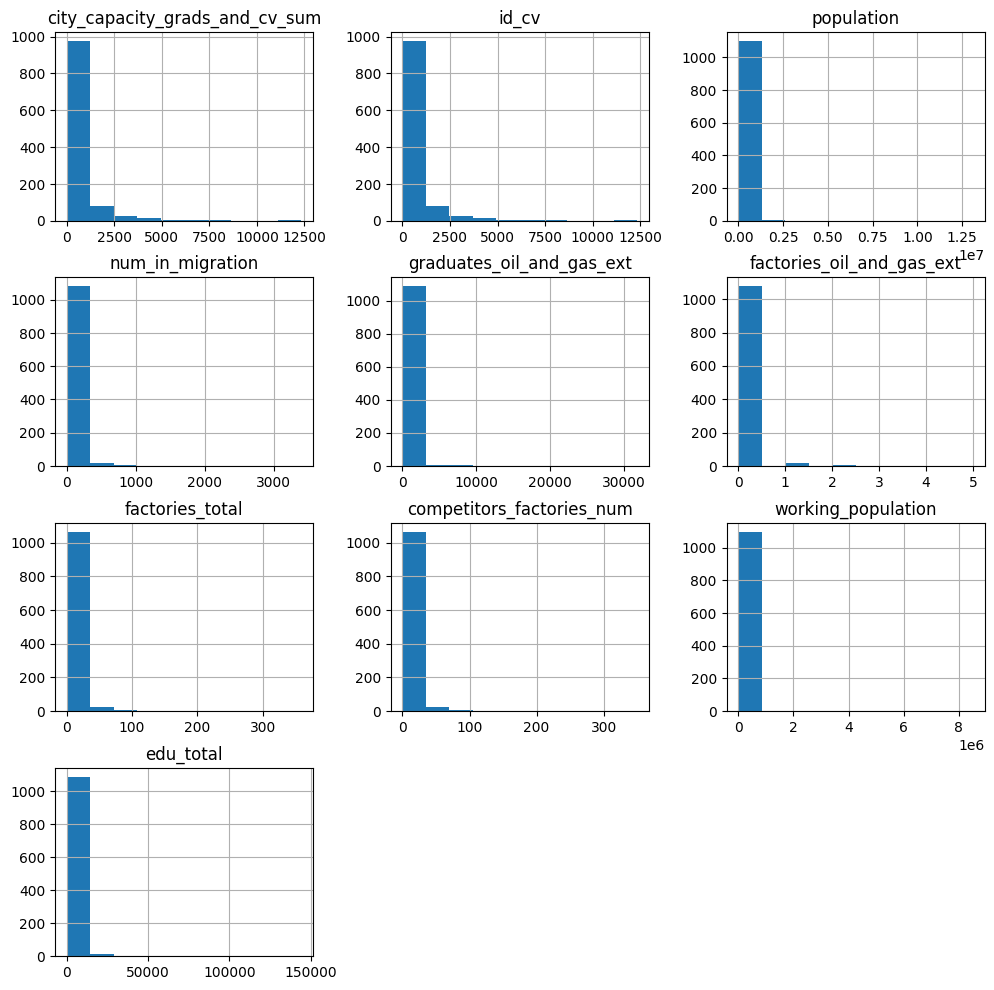

In [705]:
grouped_grads[mask_type].dropna().hist(figsize=[12, 12])

In [706]:
grouped_grads[mask_type].drop(columns=["cluster_center", "type"]).sort_values(
    by="city_capacity_grads_and_cv_sum"
).corr()

,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
city_capacity_grads_and_cv_sum,1.000000,1.000000,0.552335,0.575605,0.518399,0.313302,0.651090,0.649233,0.552335,0.579770
id_cv,1.000000,1.000000,0.552335,0.575605,0.518399,0.313302,0.651090,0.649233,0.552335,0.579770
population,0.552335,0.552335,1.000000,0.899865,0.880170,0.625970,0.832695,0.828332,1.000000,0.965239
num_in_migration,0.575605,0.575605,0.899865,1.000000,0.795595,0.536225,0.877181,0.874253,0.899865,0.890686
graduates_oil_and_gas_ext,0.518399,0.518399,0.880170,0.795595,1.000000,0.614000,0.721083,0.715260,0.880170,0.939556
factories_oil_and_gas_ext,0.313302,0.313302,0.625970,0.536225,0.614000,1.000000,0.476417,0.466543,0.625970,0.610252
factories_total,0.651090,0.651090,0.832695,0.877181,0.721083,0.476417,1.000000,0.999766,0.832695,0.840164
competitors_factories_num,0.649233,0.649233,0.828332,0.874253,0.715260,0.466543,0.999766,1.000000,0.828332,0.835194
working_population,0.552335,0.552335,1.000000,0.899865,0.880170,0.625970,0.832695,0.828332,1.000000,0.965239
edu_total,0.579770,0.579770,0.965239,0.890686,0.939556,0.610252,0.840164,0.835194,0.965239,1.000000


In [707]:
grouped_grads[mask_type].drop(columns=["cluster_center", "type"]).sort_values(
    by="city_capacity_grads_and_cv_sum"
)

,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
555,1,1.0,5855,1,0,0,0,0,3806,0
1513,3,3.0,9626,3,0,0,0,0,6257,0
1072,3,3.0,7760,8,0,0,0,0,5044,0
1091,3,3.0,12154,16,0,0,1,1,7900,11
782,6,6.0,9040,3,0,0,0,0,5876,0
...,...,...,...,...,...,...,...,...,...,...
337,7815,7815.0,31894,2,0,0,0,0,20731,26
939,8628,8628.0,13104177,3400,31810,5,359,350,8517715,144268
1305,9245,9245.0,1027153,528,1968,0,101,101,667649,13348
339,11437,11437.0,126078,5,0,0,1,1,81951,162


In [708]:
from sklearn.preprocessing import quantile_transform

In [709]:
X

array([[8.61378898e-04, 0.00000000e+00, 5.68181818e-01, ...,
        5.40540541e-01, 1.78233598e-01, 0.00000000e+00],
       [1.40864106e-02, 0.00000000e+00, 5.68181818e-01, ...,
        5.67567568e-01, 1.98906839e-01, 1.67130919e-02],
       [1.23776950e-03, 0.00000000e+00, 5.22727273e-01, ...,
        7.02702703e-01, 5.72194994e-02, 5.57103064e-03],
       ...,
       [1.03789785e-05, 0.00000000e+00, 2.50000000e-01, ...,
        7.29729730e-01, 1.78233598e-01, 0.00000000e+00],
       [1.85218976e-04, 0.00000000e+00, 1.59090909e-01, ...,
        5.40540541e-01, 1.95034388e-02, 0.00000000e+00],
       [7.06686329e-04, 0.00000000e+00, 5.00000000e-01, ...,
        4.05405405e-01, 7.73885158e-02, 1.11420613e-02]])

In [710]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

target = "num_in_migration"


grouped_grads.dropna(inplace=True)
X = grouped_grads[mask_type].drop(
    columns=[
        "cluster_center",
        "type",
        "population",
        "factories_total",
    ]
    + [target]
)
y = np.log(grouped_grads[mask_type].loc[:, target].to_frame() + 1) + 1

X = np.log(X + 1) + 1

# # Шаг 2: Разделение данных на обучающую и тестовую выборки
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Шаг 3: Создание и обучение модели
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Шаг 4: Прогнозирование на тестовой выборке
# y_pred_train = model.predict(X_train)
# y_pred = model.predict(X_test)


# y_pred = np.exp(y_pred)
# y_pred_train = np.exp(y_pred_train)
# y_train = np.exp(y_train)
# y_test = np.exp(y_test)

# mse = np.mean((y_test - model.predict(X_test)) ** 2)
# # y_pred = np.expm1(y_pred + (mse / 2))


# # from sklearn.metrics import mean_squared_log_error

# # rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))

# # Шаг 5: Оценка модели
# mse = round(mean_squared_error(y_test, y_pred), 2)
# mse_tr = round(mean_squared_error(y_train, y_pred_train), 2)

# r2 = round(r2_score(y_test, y_pred), 2)

# # Calculate MAPE
# mape = round(np.mean(np.abs((y_test - y_pred) / y_test)) * 100, 2)

# # y_pred_tr = model.predict(X_train)
# r2_tr = round(r2_score(y_train, y_pred_train), 2)

# # # Calculate MAPE
# mape_tr = round(np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100, 2)


# # print(f"Mean Squared Error: {mse}")
# print(f"MAPE: {mape}%")
# print(f"R^2 Score: {r2}")

# # print("rmsle: ", rmsle)


# # print(f"MAPE_train: {mape_tr}%")
# # print(f"R^2 Score_train: {r2_tr}")
# # Вывод коэффициентов
# # print(f"Coefficient: {model.coef_[0]}")
# # print(f"Intercept: {model.intercept_}")

In [711]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming y_pred and y_test are already defined as numpy arrays or similar

# # Create DataFrames for predicted and actual values
# pred_df = pd.DataFrame(y_pred).rename(columns={0: "pred"}).reset_index(drop=True)
# test_df = pd.DataFrame(y_test).reset_index(drop=True)

# # Create a figure and axis
# plt.figure(figsize=(12, 6))
# ax = plt.gca()  # Get current axis

# # Plot histogram for predicted values
# pred_df.hist(alpha=0.5, color="r", bins=30, ax=ax, label="Predicted Values")

# # Plot histogram for actual values
# test_df.hist(alpha=0.5, bins=30, ax=ax, label="Actual Values")

# # Set limits for x and y axes
# plt.xlim([0, 1000])
# plt.ylim([0, 50])

# # Add title and labels
# plt.title("Comparison of Predicted and Actual Value Distributions")
# plt.xlabel("Values")
# plt.ylabel("Frequency")

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [712]:
# import matplotlib.pyplot as plt
# from sklearn.compose import TransformedTargetRegressor
# from sklearn.linear_model import RidgeCV
# from sklearn.metrics import PredictionErrorDisplay
# from sklearn.preprocessing import QuantileTransformer
# from sklearn.metrics import median_absolute_error


# def compute_score(y_true, y_pred):
#     return {
#         "R2": f"{r2_score(y_true, y_pred):.3f}",
#         "MedAE": f"{median_absolute_error(y_true, y_pred):.3f}",
#     }


# f, (ax0, ax1) = plt.subplots(2, 2, sharey="row", figsize=(6.5, 8))

# ridge_cv = LinearRegression().fit(X_train, y_train)
# y_pred_ridge = ridge_cv.predict(X_test)

# ridge_cv_with_trans_target = TransformedTargetRegressor(
#     regressor=LinearRegression(),
#     transformer=QuantileTransformer(n_quantiles=10, output_distribution="normal"),
# ).fit(X_train, y_train)
# y_pred_ridge_with_trans_target = ridge_cv_with_trans_target.predict(X_test)

# # plot the actual vs predicted values
# PredictionErrorDisplay.from_predictions(
#     y_test,
#     y_pred_ridge,
#     kind="actual_vs_predicted",
#     ax=ax0[0],
#     scatter_kwargs={"alpha": 0.5},
# )
# PredictionErrorDisplay.from_predictions(
#     y_test,
#     y_pred_ridge_with_trans_target,
#     kind="actual_vs_predicted",
#     ax=ax0[1],
#     scatter_kwargs={"alpha": 0.5},
# )

# # Add the score in the legend of each axis
# for ax, y_pred in zip([ax0[0], ax0[1]], [y_pred_ridge, y_pred_ridge_with_trans_target]):
#     for name, score in compute_score(y_test, y_pred).items():
#         ax.plot([], [], " ", label=f"{name}={score}")
#     ax.legend(loc="upper left")

# ax0[0].set_title("Ridge regression \n without target transformation")
# ax0[1].set_title("Ridge regression \n with target transformation")

# # plot the residuals vs the predicted values
# PredictionErrorDisplay.from_predictions(
#     y_test,
#     y_pred_ridge,
#     kind="residual_vs_predicted",
#     ax=ax1[0],
#     scatter_kwargs={"alpha": 0.5},
# )
# PredictionErrorDisplay.from_predictions(
#     y_test,
#     y_pred_ridge_with_trans_target,
#     kind="residual_vs_predicted",
#     ax=ax1[1],
#     scatter_kwargs={"alpha": 0.5},
# )
# ax1[0].set_title("Ridge regression \n without target transformation")
# ax1[1].set_title("Ridge regression \n with target transformation")

# f.suptitle("Ames housing data: selling price", y=1.05)
# plt.tight_layout()
# plt.show()

In [713]:
# data["log_total"]

In [714]:
# # Create a GeoDataFrame
# gdf = gpd.GeoDataFrame(
#     {
#         "distance": [data["distance"]],
#         "duration_h": [round(data["duration"] / 3600, 2)],
#         "geometry": ["geometry"],
#     }
# )

# # Set the coordinate reference system (CRS) if needed
# gdf.set_crs(epsg=4326, inplace=True)  # WGS84

# # Display the GeoDataFrame
# gdf.explore()


# # Example usage
# # start = (13.388860, 52.517037)  # Starting point (longitude, latitude)
# # end = (13.397634, 52.529407)  # Destination point (longitude, latitude)

# # route_info = get_route(start, end)
# # if route_info:
# #     print(f"Distance: {route_info['distance']} meters")
# #     print(f"Duration: {route_info['duration']} seconds")
# #     print("Geometry (decoded points):", route_info["geometry"])

In [715]:
# import requests


# def get_closest_point(coords):
#     # Construct the URL for the OSRM nearest API
#     url = f"http://router.project-osrm.org/nearest/v1/driving/{coords[0]},{coords[1]}"

#     # Send the GET request to the OSRM API
#     response = requests.get(url)

#     # Check if the response is successful
#     if response.status_code == 200:
#         nearest_data = response.json()
#         if nearest_data["code"] == "Ok":
#             # Extracting the closest point's coordinates
#             closest_point = nearest_data["waypoints"][0]["location"]
#             return {
#                 "closest_lat": closest_point[1],  # Latitude
#                 "closest_lng": closest_point[0],  # Longitude
#                 "distance": nearest_data["waypoints"][0][
#                     "distance"
#                 ],  # Distance to nearest point
#             }
#         else:
#             print("Error in finding nearest point:", nearest_data["message"])
#             return None
#     else:
#         print("HTTP Error:", response.status_code)
#         return None


# # Example usage with coordinates that may not be routable
# coords = (test_point.x, test_point.y)  # Example coordinates (longitude, latitude)
# closest_point_info = get_closest_point(coords)
# print(closest_point_info)

In [716]:
# pip install polyline

In [717]:
# rus = ox.geocode_to_gdf("Краснодарский край")
# rus

In [718]:
# rus = rus.explode().to_crs(3857).reset_index(drop=True)
# rus["area"] = rus.geometry.area
# rus = rus.sort_values(by="area", ascending=False).to_crs(4326)
# rus.loc[0, "geometry"]

In [719]:
# from shapely.geometry import Polygon, mapping


# def h3_to_polygons(h3_indices):
#     # polygons = []
#     # for h in h3_indices:
#     # Get the boundary of each hexagon as a polygon
#     boundary = h3.h3_to_geo_boundary(h3_indices, geo_json=True)
#     polygon = Polygon(boundary)
#     # polygons.append(polygon)
#     return polygon


# # Set the desired H3 resolution
# resolution = 8  # You can adjust this based on your needs

# # Fill the polygon with H3 hexagons
# hexagons = h3.polyfill(
#     mapping(rus.loc[0, "geometry"]), resolution, geo_json_conformant=True
# )

# convert = lambda hexid: h3_to_polygons(hexid)
# polys_hex = list(map(convert, list(hexagons)))

In [720]:
# polys_hex

In [721]:
# # Create a GeoDataFrame from hexagon polygons
# gdf_hexagons = gpd.GeoDataFrame(geometry=polys_hex, crs=4326)
# # gdf_hexagons.explore()

In [722]:
# gdf

In [723]:
# gdf_hexagons.to_crs(3857).sjoin(
#     gdf.to_crs(3857).buffer(0.01).to_frame()
# ).reset_index().explore()

In [724]:
# -----------------------------------------------------

In [725]:
grouped_grads.sort_values(by="id_cv")

,cluster_center,type,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total
2113,"Ярославская область, Ярославль",СПО,1307,0.0,570824,443,559,0,65,65,371036,7030
742,"Красноярский край, Боготол",СПО,80,0.0,17841,1,0,0,1,1,11597,80
1509,"Саратовская область, Энгельс",ВПО,641,0.0,223333,62,131,0,23,21,145166,1420
1507,"Саратовская область, Шиханы",СПО,12,0.0,4958,3,0,0,0,0,3223,12
745,"Красноярский край, Дивногорск",СПО,69,0.0,27679,8,0,0,3,3,17991,69
...,...,...,...,...,...,...,...,...,...,...,...,...
337,"Дагестан, Дагестанские Огни",CV,7815,7815.0,31894,2,0,0,0,0,20731,26
939,"Москва, Москва",CV,8628,8628.0,13104177,3400,31810,5,359,350,8517715,144268
1305,"Пермский край, Пермь",CV,9245,9245.0,1027153,528,1968,0,101,101,667649,13348
339,"Дагестан, Дербент",CV,11437,11437.0,126078,5,0,0,1,1,81951,162


In [726]:
grouped_grads["left_working_population_by_factories"] = (
    (grouped_grads["working_population"] / (grouped_grads["factories_total"] + 1))
    .round(0)
    .astype(int)
)

In [727]:
grouped_grads

,cluster_center,type,city_capacity_grads_and_cv_sum,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total,left_working_population_by_factories
0,"Адыгея, Адыгейск",CV,118,118.0,13191,4,0,0,0,0,8574,0,8574
1,"Адыгея, Майкоп",CV,260,260.0,139687,20,554,0,6,5,90797,2653,12971
2,"Адыгея, Майкоп",ВПО,1993,0.0,139687,20,554,0,6,5,90797,2653,12971
3,"Адыгея, Майкоп",СПО,660,0.0,139687,20,554,0,6,5,90797,2653,12971
4,"Алтай, Горно-Алтайск",CV,508,508.0,64957,7,468,0,1,1,42222,1297,21111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2109,"Ярославская область, Углич",CV,226,226.0,32228,4,0,0,5,5,20948,40,3491
2110,"Ярославская область, Углич",СПО,40,0.0,32228,4,0,0,5,5,20948,40,3491
2111,"Ярославская область, Ярославль",CV,2134,2134.0,570824,443,559,0,65,65,371036,7030,5622
2112,"Ярославская область, Ярославль",ВПО,5723,0.0,570824,443,559,0,65,65,371036,7030,5622


In [728]:
mask = grouped_grads["type"] == "CV"
cvs = grouped_grads[mask].copy()
cvs.drop(columns="city_capacity_grads_and_cv_sum", inplace=True)
cvs.sample(3)

,cluster_center,type,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total,left_working_population_by_factories
1393,"Ростовская область, Константиновск",CV,320.0,16910,1,17,0,0,0,10992,88,10992
1958,"Челябинская область, Верхнеуральск",CV,174.0,8861,1,0,0,0,0,5760,52,5760
1367,"Псковская область, Пыталово",CV,34.0,5278,1,0,0,0,0,3431,0,3431


In [729]:
# cvs["cvs_by_population"] = cvs["population"] / cvs["city_capacity_grads_and_cv_sum"]
# cvs["cvs_by_working_population"] = (
#     cvs["left_working_population_by_factories"] / cvs["city_capacity_grads_and_cv_sum"]
# )
# cvs["cvs_by_factories"] = cvs["factories_total"] / cvs["city_capacity_grads_and_cv_sum"]
# cvs["cvs_by_factories_and_by_working_pops"] = 1e-6 * (
#     cvs["left_working_population_by_factories"] / cvs["cvs_by_factories"]
# )

In [730]:
cvs.head(1)

,cluster_center,type,id_cv,population,num_in_migration,graduates_oil_and_gas_ext,factories_oil_and_gas_ext,factories_total,competitors_factories_num,working_population,edu_total,left_working_population_by_factories
0,"Адыгея, Адыгейск",CV,118.0,13191,4,0,0,0,0,8574,0,8574


In [731]:
# cvs.iloc[:, [0, 1, 2, 4, -8, -1]].sample(3)

In [732]:
import statsmodels.api as sm

In [733]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [734]:
data["id_cv"].hist()

TypeError: list indices must be integers or slices, not str

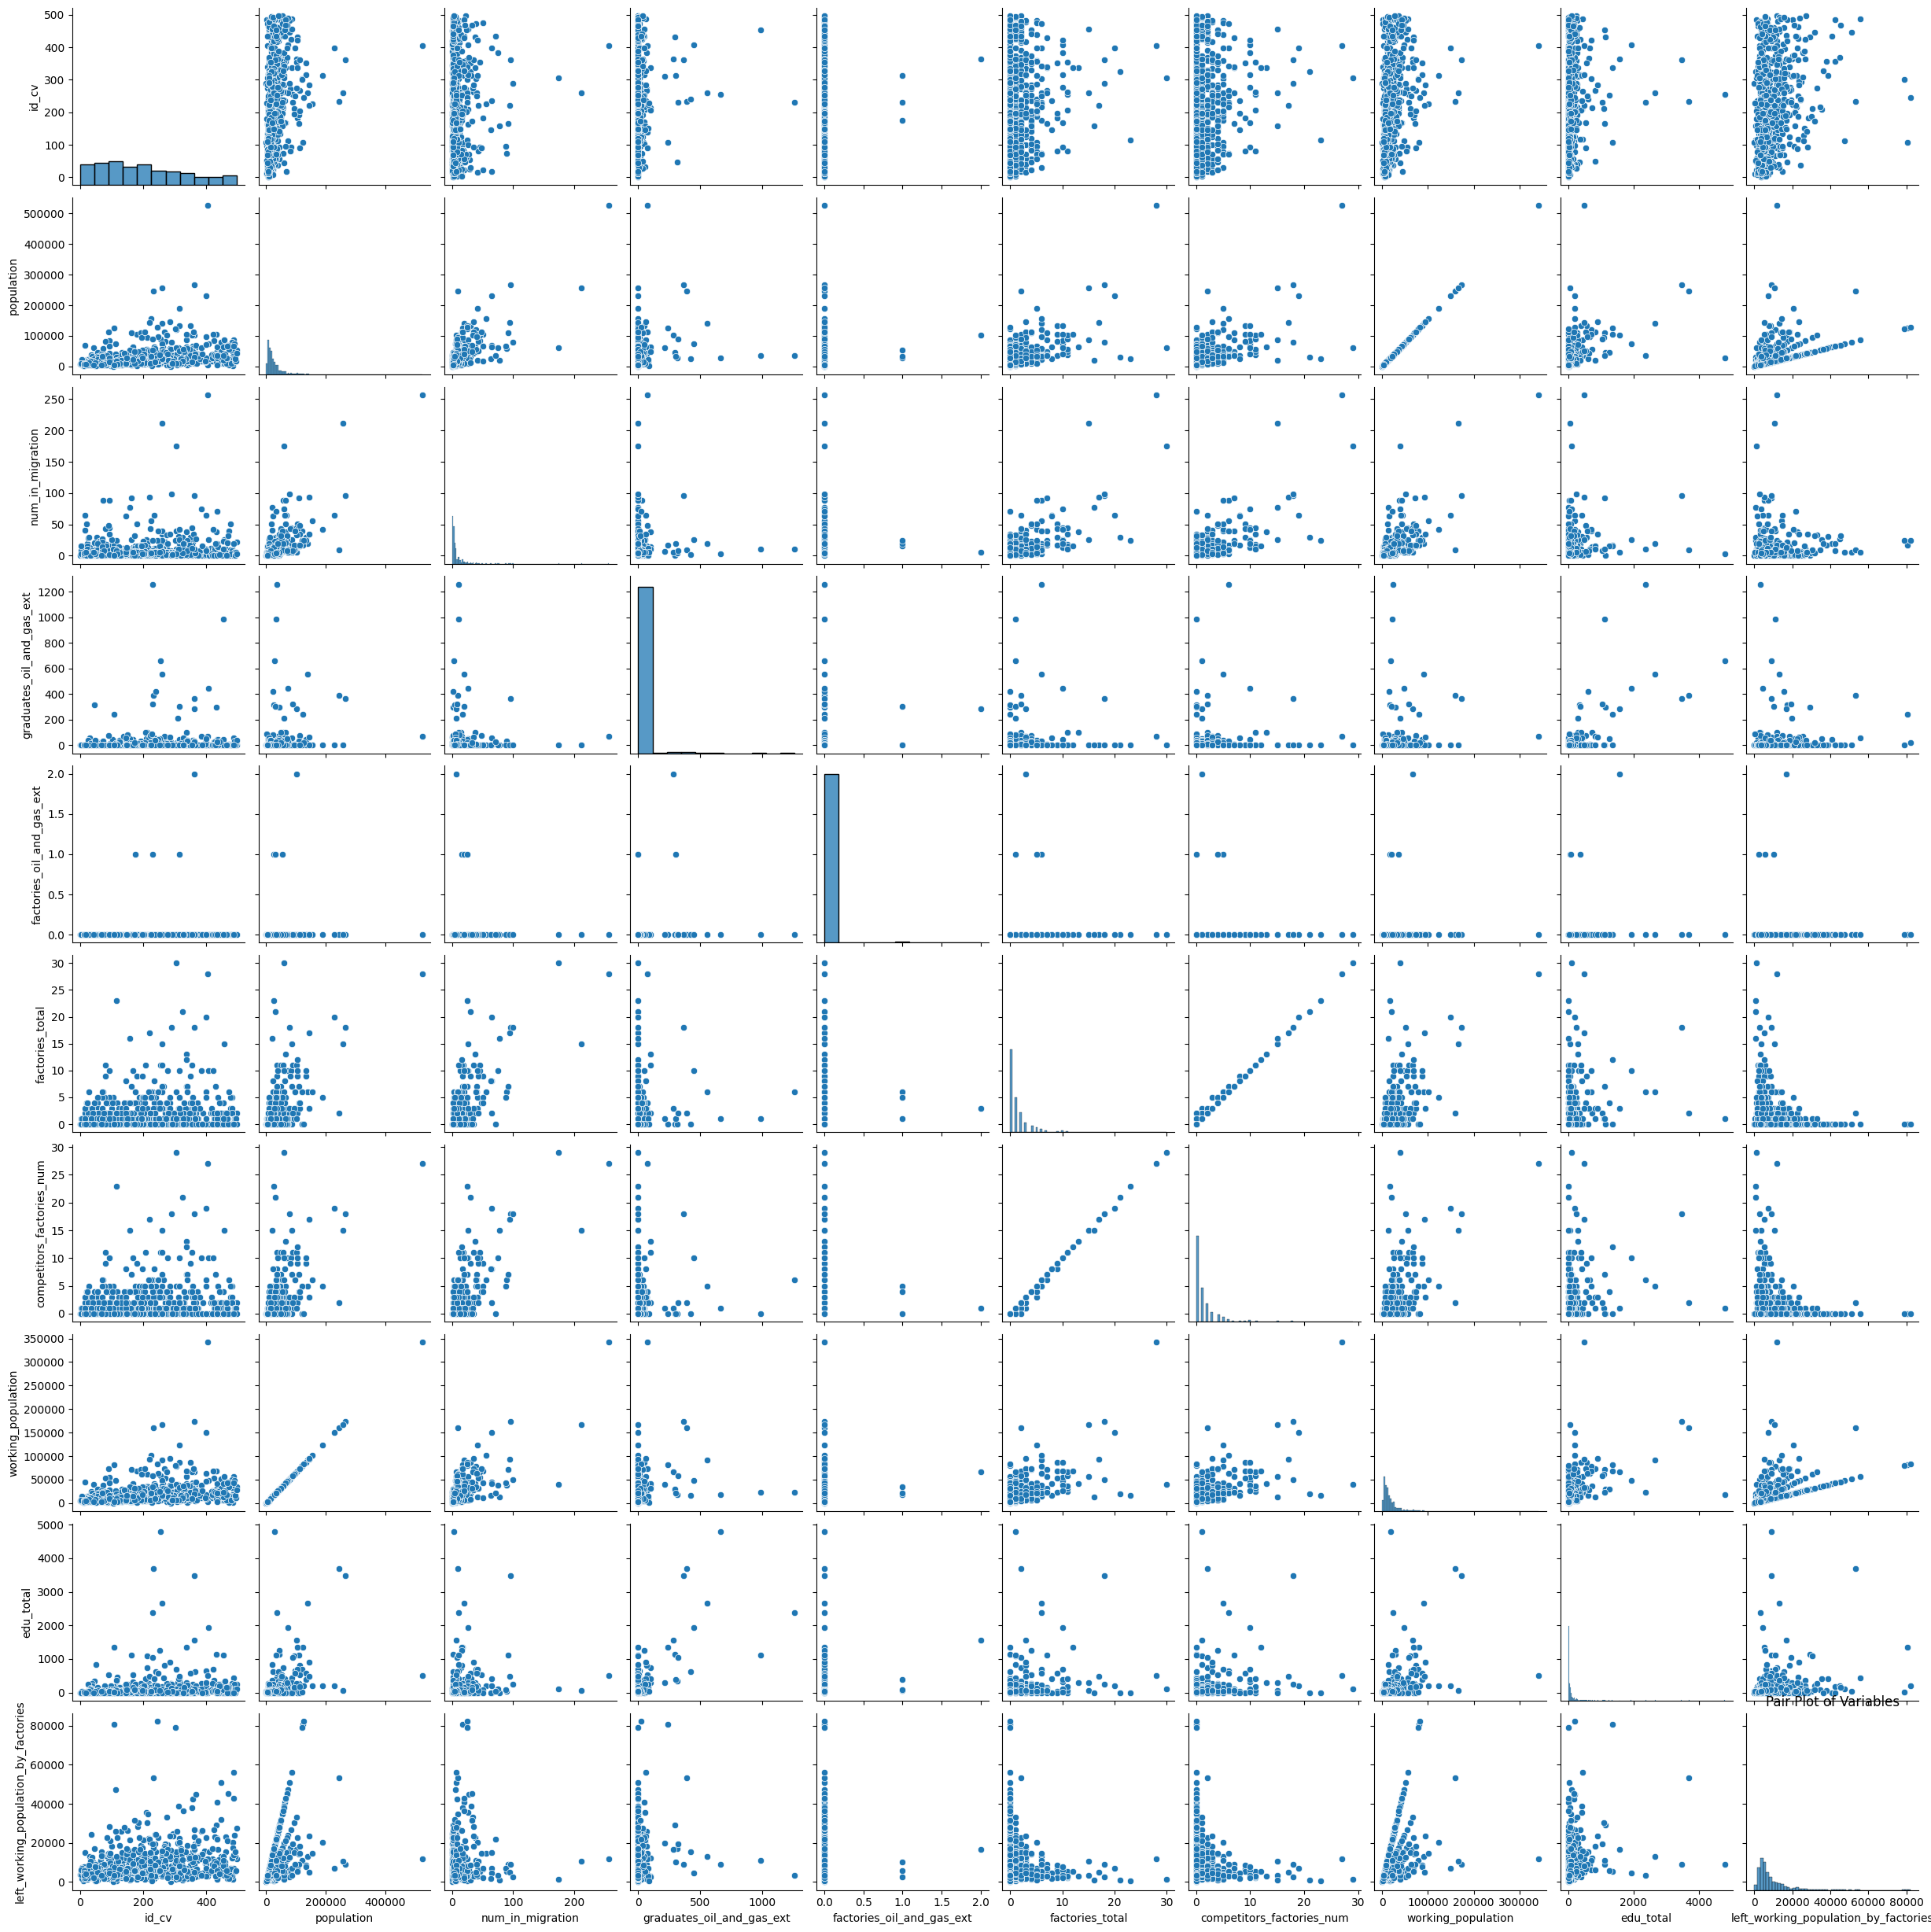

In [512]:
# Создание pairplot
sns.pairplot(data.drop(columns=["cluster_center", "type"]))
plt.title("Pair Plot of Variables")
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  id_cv   No. Observations:                  594
Model:                            GLM   Df Residuals:                      584
Model Family:                Gaussian   Df Model:                            9
Link Function:               Identity   Scale:                          14978.
Method:                          IRLS   Log-Likelihood:                -3693.3
Date:                Wed, 06 Nov 2024   Deviance:                   8.7473e+06
Time:                        02:19:01   Pearson chi2:                 8.75e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1771
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


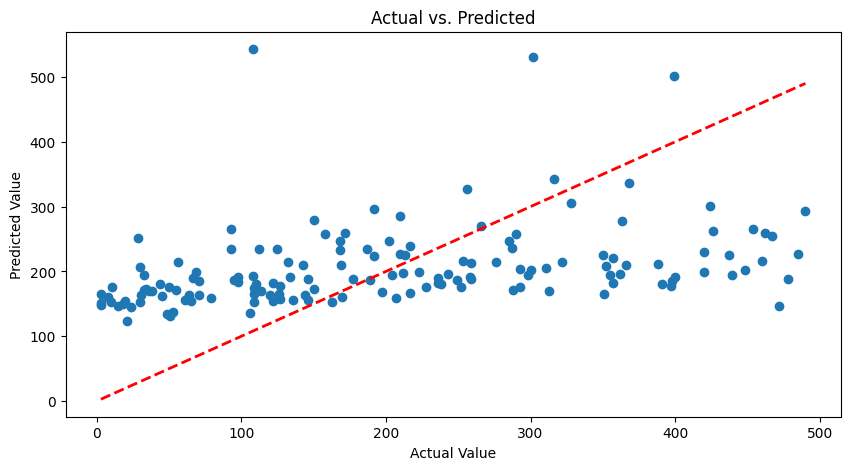

In [507]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score

data = cvs.copy()
data = data[data["id_cv"] < 500].copy()

# Splitting the dataset into training and test sets
X = data.drop(columns=["cluster_center", "type", "id_cv"])
y = data["id_cv"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Add a constant to the independent variables (for the intercept)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the Generalized Linear Model
model = sm.GLM(y_train, X_train_sm)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Making predictions
y_pred = results.predict(X_test_sm)

# Evaluate the model
mse = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAPE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    lw=2,
)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs. Predicted")
plt.show()

In [443]:
# cities["rel_migr"] = cities["num_in_migration"] / cities["factories_total"]
# cities.loc[cities["rel_migr"] > 1e6, "rel_migr"] = 1
# cities.loc[cities["rel_migr"] > 40, "rel_migr"] = 40

In [444]:
# cities["rel_factory"] = cities["factories_total"] / (cities["population"] / 1e6)

In [445]:
# cities["rel_factory"].describe()

In [446]:
# cities["rel_migr"].describe()

In [447]:
# cities["rel_migr"].hist()

In [448]:
# cities["rel_factory"].hist()

In [774]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

old_all_cities = cities.copy()
cities = cities[
    (cities["num_in_migration"] > 1)
    & (cities["num_in_migration"] < 500)
    # & (cities["rel_migr"] > 0)
    & (cities["population"] < 1e6)
].copy()

scaler_x = MinMaxScaler()


def preprocess_x(cities, fit=False):
    X = cities[
        [
            "population",
            "harsh_climate",
            # "ueqi_score",
            "ueqi_residential",
            "ueqi_street_networks",
            "ueqi_green_spaces",
            "ueqi_public_and_business_infrastructure",
            "ueqi_social_and_leisure_infrastructure",
            "ueqi_citywide_space",
            "median_salary",
            "factories_total",
            # "rel_migr"
            # "vacancies_total",
        ]
    ]

    # X["population"] = np.log(X["population"])
    # X["median_salary"] = np.log(X["median_salary"])
    # X["vacancies_total"] = np.log(X["vacancies_total"])

    # y = np.log(cities["num_in_migration"])
    # y = cities[["num_in_migration"]]

    # Step 1: Initialize the MinMaxScaler
    if fit:
        X_scaled = scaler_x.fit_transform(X)
    else:
        X_scaled = scaler_x.transform(X)
    return X_scaled


def preprocess_y(cities):
    return np.log(cities["num_in_migration"])


X_scaled = preprocess_x(cities, fit=True)
X = preprocess_x(old_all_cities, fit=True)
Y = old_all_cities["num_in_migration"].reset_index(drop=True)
y = cities["num_in_migration"].reset_index(drop=True)
# y = preprocess_y(cities)

# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X_scaled, y, test_size=0.3, random_state=42
# )

In [736]:
pd.DataFrame(X_scaled).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,-0.039821,0.080049,0.082997,0.108425,0.151975,0.240142,0.148104,0.071950,0.832019
1,-0.039821,1.000000,-0.154105,0.022203,0.019940,-0.153641,-0.004241,-0.059540,0.559520,-0.086744
2,0.080049,-0.154105,1.000000,0.301541,0.137159,0.376261,0.287525,0.156698,0.002072,0.112406
3,0.082997,0.022203,0.301541,1.000000,0.161168,0.198944,0.158754,0.118252,0.102681,0.069284
4,0.108425,0.019940,0.137159,0.161168,1.000000,0.173893,0.233451,0.069205,0.095849,0.116331
5,0.151975,-0.153641,0.376261,0.198944,0.173893,1.000000,0.367645,0.094240,0.096298,0.156679
6,0.240142,-0.004241,0.287525,0.158754,0.233451,0.367645,1.000000,0.186792,0.144580,0.280631
7,0.148104,-0.059540,0.156698,0.118252,0.069205,0.094240,0.186792,1.000000,-0.050526,0.101381
8,0.071950,0.559520,0.002072,0.102681,0.095849,0.096298,0.144580,-0.050526,1.000000,0.085810
9,0.832019,-0.086744,0.112406,0.069284,0.116331,0.156679,0.280631,0.101381,0.085810,1.000000


In [737]:
pd.concat([pd.DataFrame(X_scaled), y.to_frame()], axis=1).dropna()

,0,1,2,3,4,5,6,7,8,9,num_in_migration
0,0.014086,0.0,0.558140,0.542857,0.340909,0.666667,0.634146,0.567568,0.198907,0.016713,17.594633
1,0.002907,0.0,0.418605,0.314286,0.250000,0.355556,0.292683,0.540541,0.196386,0.005571,7.420949
2,0.001010,0.0,0.534884,0.885714,0.409091,0.400000,0.463415,0.513514,0.071560,0.002786,4.039961
3,0.001457,0.0,0.604651,0.428571,0.409091,0.311111,0.317073,0.513514,0.077389,0.000000,2.911601
4,0.000948,0.0,0.860465,0.428571,0.340909,0.377778,0.414634,0.378378,0.178234,0.000000,3.583744
...,...,...,...,...,...,...,...,...,...,...,...
919,0.001116,0.0,0.441860,0.600000,0.386364,0.488889,0.317073,0.324324,0.201428,0.000000,2.128255
920,0.000424,1.0,0.093023,0.257143,0.045455,0.133333,0.195122,0.351351,0.548093,0.000000,5.917965
921,0.000720,0.0,0.255814,0.342857,0.363636,0.355556,0.414634,0.513514,0.077389,0.005571,2.516103
922,0.000010,0.0,0.232558,0.371429,0.545455,0.222222,0.463415,0.729730,0.178234,0.000000,4.288906


In [775]:
from smogn import smoter  # или можно использовать imbalanced_learn для SMOTER

# Создаем сбалансированный датасет для регрессии
X_resampled = smoter(
    data=pd.concat([pd.DataFrame(X_scaled), y.to_frame()], axis=1).dropna(),
    y="num_in_migration",
    k=50,
    pert=0.02,
    rel_thres=0.3,  # порог для определения редких значений
    rel_method="auto",  # автоматическое определение редких значений
    samp_method="extreme",
)

# Разделяем признаки и целевую переменную
y_resampled = np.log(X_resampled["num_in_migration"])
X_resampled = np.log(X_resampled.drop("num_in_migration", axis=1))

r_index: 100%|##########| 21/21 [00:00<00:00, 2288.34it/s]
/Users/test/Documents/code/IL2/industrial-location/.venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [776]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# model = CatBoostRegressor(
#     iterations=5000,
#     learning_rate=0.005,
#     random_seed=42,
#     loss_function="Quantile",
#     early_stopping_rounds=50,
#     metric_period=200,
# )

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)


model = CatBoostRegressor(
    loss_function="Quantile",  # или 'Tweedie' с параметром variance_power
    eval_metric="MAPE",
    iterations=5000,
    learning_rate=0.03,
    depth=6,
    random_seed=42,
    early_stopping_rounds=50,
)

# model.fit(X_train, y_train)

import numpy as np


def calculate_weights(y):
    # Создаем веса обратно пропорциональные значениям
    weights = 1 / (1 + np.log1p(y))
    # Нормализуем веса
    weights = weights / weights.mean()
    return weights


# Создаем веса
sample_weights = calculate_weights(y_train)

# Обучаем модель с весами
# model = CatBoostRegressor(loss_function="MAE", iterations=1000)

model.fit(
    X_train.iloc[:-50],
    y_train.iloc[:-50],
    # sample_weight=sample_weights,
    eval_set=(X_train.iloc[-50:], y_train.iloc[-50:]),
    early_stopping_rounds=50,
    verbose=100,
)

y_test = np.exp(y_test)
y_train = np.exp(y_train)

pred_test = np.exp(model.predict(X_test))
print(mean_absolute_percentage_error(pred_test, y_test))

pred_train = np.exp(model.predict(X_train))
print(mean_absolute_percentage_error(pred_train, y_train))

0:	learn: 0.6439725	test: 0.6643628	best: 0.6643628 (0)	total: 1.06ms	remaining: 5.28s
100:	learn: 0.1872979	test: 0.2326995	best: 0.2326995 (100)	total: 74.4ms	remaining: 3.61s
200:	learn: 0.1527223	test: 0.2242465	best: 0.2241862 (199)	total: 145ms	remaining: 3.47s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.2224286169
bestIteration = 225

Shrink model to first 226 iterations.
0.44082050887198637
0.3211998704295213


In [2143]:
X_test

,0,1,2,3,4,5,6,7,8,9
158,0.035051,0.000000,0.657895,0.606061,0.261905,0.641026,0.638889,0.354839,0.218572,0.064220
39,0.063107,0.000000,0.630829,0.307851,0.693100,0.411662,0.414841,0.416987,0.230572,0.069518
207,0.128260,0.000000,0.552632,0.424242,0.595238,0.410256,0.361111,0.483871,0.218572,0.100917
202,0.019885,0.000000,1.000000,0.545455,0.833333,0.282051,0.333333,0.387097,0.480769,0.045872
153,0.545023,0.000000,0.673212,0.415484,0.553757,0.560797,0.645183,0.439138,0.146345,0.405139
...,...,...,...,...,...,...,...,...,...,...
29,0.249714,0.000554,0.446285,0.575458,0.186823,0.259457,0.530993,0.352176,0.108810,0.206597
148,0.944827,0.000000,0.760367,0.542241,0.570419,0.567366,0.963974,0.360996,0.284494,0.523743
111,0.035907,0.000000,0.815789,0.393939,0.714286,0.897436,0.500000,0.516129,0.480769,0.082569
26,0.127438,0.641323,0.364985,0.396243,0.239905,0.470185,0.424518,0.463183,0.422679,0.055243


In [ ]:
from optuna import create_study

y_test = np.log(y_test)
y_train = np.log(y_train)


def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1, 10),
        "random_strength": trial.suggest_loguniform("random_strength", 1e-9, 10),
        "bagging_temperature": trial.suggest_loguniform("bagging_temperature", 1e-7, 1),
        # "loss_function": "RMSE",
        "loss_function": "Quantile",
        "eval_metric": "MAPE",
    }

    model = CatBoostRegressor(**params)

    # Обучаем модель на логарифмированных данных
    model.fit(
        X_train.iloc[:-50],
        y_train.iloc[:-50],
        # sample_weight=sample_weights,
        eval_set=(X_train.iloc[-50:], y_train.iloc[-50:]),
        early_stopping_rounds=50,
        verbose=100,
    )

    # Оцениваем на валидационном наборе
    pred_test = model.predict(X_test)
    score = mean_absolute_percentage_error(pred_test, y_test)

    return score


# Запускаем оптимизацию
study = create_study(direction="minimize")
study.optimize(objective, n_trials=100, n_jobs=10, show_progress_bar=True)

In [778]:
study.best_value

0.19510988802614435

In [779]:
params = study.best_params
model = CatBoostRegressor(**params)

# Обучаем модель на логарифмированных данных
model.fit(
    X_train.iloc[:-50],
    y_train.iloc[:-50],
    # sample_weight=sample_weights,
    eval_set=(X_train.iloc[-50:], y_train.iloc[-50:]),
    early_stopping_rounds=50,
    verbose=100,
)

0:	learn: 1.3724570	test: 1.3000843	best: 1.3000843 (0)	total: 4.71ms	remaining: 4.71s
100:	learn: 0.6035624	test: 0.6296006	best: 0.6296006 (100)	total: 438ms	remaining: 3.9s
200:	learn: 0.3794083	test: 0.5225145	best: 0.5225145 (200)	total: 859ms	remaining: 3.42s
300:	learn: 0.2868732	test: 0.5047178	best: 0.5047178 (300)	total: 1.25s	remaining: 2.9s
400:	learn: 0.2301446	test: 0.5000322	best: 0.4999757 (394)	total: 1.64s	remaining: 2.44s
500:	learn: 0.1916236	test: 0.4960813	best: 0.4959776 (468)	total: 2.03s	remaining: 2.02s
600:	learn: 0.1611571	test: 0.4937182	best: 0.4937182 (600)	total: 2.44s	remaining: 1.62s
700:	learn: 0.1350294	test: 0.4910282	best: 0.4907632 (692)	total: 2.83s	remaining: 1.21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4907583717
bestIteration = 728

Shrink model to first 729 iterations.


In [780]:
y_test = np.exp(y_test)
y_train = np.exp(y_train)

In [781]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error


pred_test = np.exp(model.predict(X_test))
mean_absolute_percentage_error(pred_test, y_test)

0.4039991068313401

In [751]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

pred_test = np.exp(model.predict(X_test))
print(mean_absolute_percentage_error(pred_test, y_test))

pred_train = np.exp(model.predict(X_train))
print(mean_absolute_percentage_error(pred_train, y_train))

pred_train = np.exp(model.predict(X_resampled))
print(mean_absolute_percentage_error(pred_train, y_resampled))

pred_train_old_total = np.exp(model.predict(np.log(X)))
print(mean_absolute_percentage_error(pred_train_old_total, Y))

0.19384253754664768
0.11403299290003553
0.13798966417371583
14.382929473561832


/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_24536/278281481.py:12: RuntimeWarning: divide by zero encountered in log
  pred_train_old_total = model.predict(np.log(X))


In [531]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

pred_test = model.predict(X_test)
print(mean_absolute_percentage_error(pred_test, y_test))

pred_train = model.predict(X_train)
print(mean_absolute_percentage_error(pred_train, y_train))

pred_train = model.predict(X_resampled)
print(mean_absolute_percentage_error(pred_train, y_resampled))

pred_train_old_total = model.predict(X)
print(mean_absolute_percentage_error(pred_train_old_total, Y))

0.2783074599991893
0.07168458633186803
0.13385430053265499
0.21623692184487847


(array([132., 147., 146., 157., 111.,  94.,  58.,  36.,  13.,  10.]),
 array([0.01878729, 0.62619326, 1.23359922, 1.84100519, 2.44841115,
        3.05581712, 3.66322308, 4.27062904, 4.87803501, 5.48544097,
        6.09284694]),
 <BarContainer object of 10 artists>)

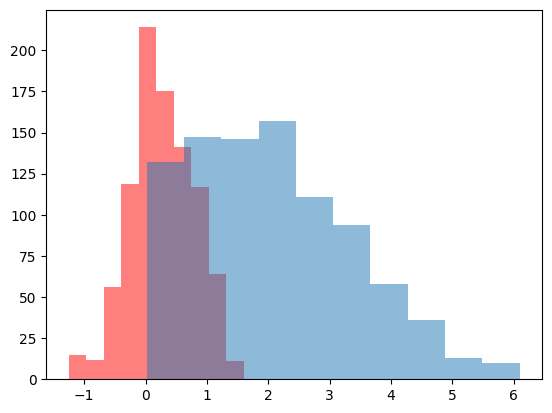

In [791]:
plt.hist(np.log(pred_train_old_total), bins=10, alpha=0.5, color="r")
plt.hist(np.log(Y), bins=10, alpha=0.5)

In [753]:
# old_all_cities["new_migr"] = pred_train_old_total

In [636]:
# old_all_cities["old_migr"] = old_all_cities["num_in_migration"]

In [637]:
# old_all_cities["new_rel_migr_fact"] = (
#     old_all_cities["new_migr"] / old_all_cities["factories_total"]
# )
# old_all_cities["new_rel_migr_pop"] = (
#     old_all_cities["new_migr"] / old_all_cities["population"]
# )

In [754]:
# old_all_cities.sort_values(by="population")

In [755]:
# old_all_cities.loc[
#     (old_all_cities["old_migr"] > 40) & (old_all_cities["old_migr"] < 120),
#     ["new_migr", "old_migr"],
# ].hist()

In [756]:
import matplotlib.pyplot as plt

(array([136.,  67.,  41.,  27.,  21.,   9.,  11.,   5.,   4.,   1.,   0.,
          3.,   2.,   2.,   1.,   3.,   1.,   0.,   0.,   5.,   2.,   0.,
          0.,   2.,   1.,   0.,   0.,   2.,   0.,   1.]),
 array([  1.01913496,  15.7381254 ,  30.45711583,  45.17610627,
         59.89509671,  74.61408715,  89.33307758, 104.05206802,
        118.77105846, 133.4900489 , 148.20903933, 162.92802977,
        177.64702021, 192.36601065, 207.08500108, 221.80399152,
        236.52298196, 251.2419724 , 265.96096283, 280.67995327,
        295.39894371, 310.11793415, 324.83692458, 339.55591502,
        354.27490546, 368.9938959 , 383.71288633, 398.43187677,
        413.15086721, 427.86985765, 442.58884808]),
 <BarContainer object of 30 artists>)

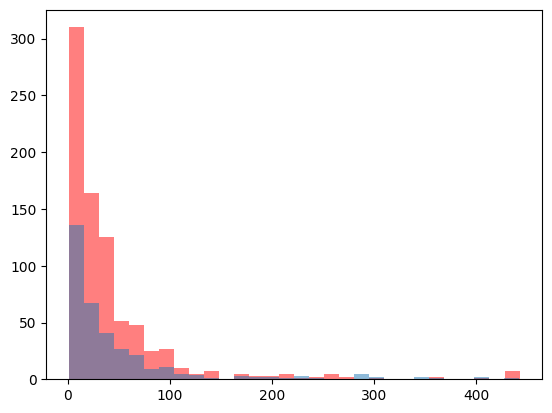

In [792]:
plt.hist(y_train, bins=30, alpha=0.5, color="r")
plt.hist(y_test, bins=30, alpha=0.5)

(array([305., 136., 167.,  64.,  47.,  20.,  10.,   5.,   4.,   6.,  12.,
          2.,   5.,   2.,   1.,   5.,   1.,   2.,   3.,   1.,   0.,   3.,
          1.,   0.,   2.,   0.,   0.,   0.,   2.,   3.]),
 array([  1.56767554,  14.87903828,  28.19040101,  41.50176375,
         54.81312649,  68.12448922,  81.43585196,  94.7472147 ,
        108.05857744, 121.36994017, 134.68130291, 147.99266565,
        161.30402838, 174.61539112, 187.92675386, 201.23811659,
        214.54947933, 227.86084207, 241.1722048 , 254.48356754,
        267.79493028, 281.10629301, 294.41765575, 307.72901849,
        321.04038122, 334.35174396, 347.6631067 , 360.97446943,
        374.28583217, 387.59719491, 400.90855764]),
 <BarContainer object of 30 artists>)

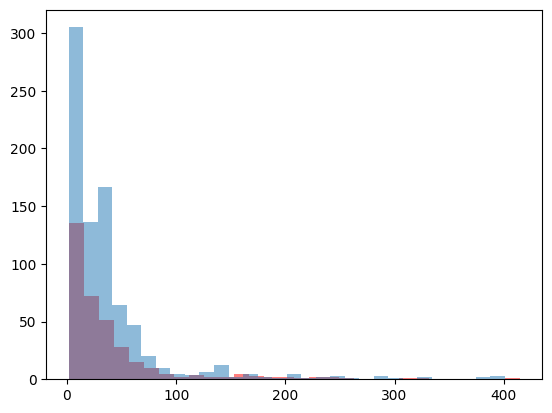

In [793]:
plt.hist(pred_test, bins=30, alpha=0.5, color="r")
plt.hist(pred_train, bins=30, alpha=0.5)

(array([258.,  53.,  11.,   9.,   7.,   5.,   1.,   2.,   0.,   1.]),
 array([  1.65412708,  42.93919305,  84.22425903, 125.509325  ,
        166.79439098, 208.07945695, 249.36452292, 290.6495889 ,
        331.93465487, 373.21972085, 414.50478682]),
 <BarContainer object of 10 artists>)

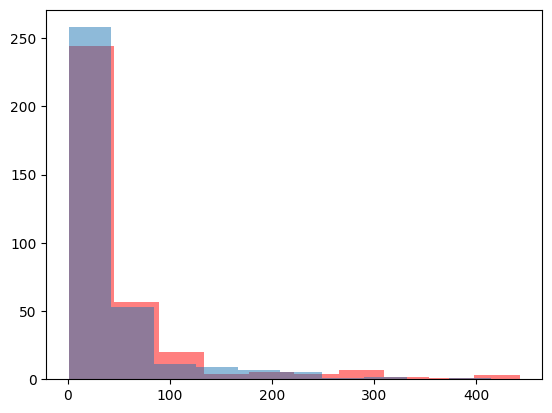

In [794]:
plt.hist(y_test, bins=10, alpha=0.5, color="r")
plt.hist(pred_test, bins=10, alpha=0.5)

(array([369., 239.,  86.,  45.,  11.,   8.,  16.,   4.,   5.,   3.,   6.,
          2.,   4.,   0.,   4.,   0.,   2.,   0.,   0.,   5.]),
 array([  1.56767554,  21.53471965,  41.50176375,  61.46880786,
         81.43585196, 101.40289607, 121.36994017, 141.33698428,
        161.30402838, 181.27107249, 201.23811659, 221.2051607 ,
        241.1722048 , 261.13924891, 281.10629301, 301.07333712,
        321.04038122, 341.00742533, 360.97446943, 380.94151354,
        400.90855764]),
 <BarContainer object of 20 artists>)

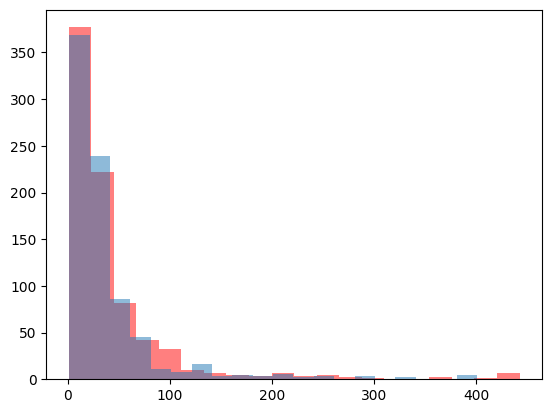

In [795]:
plt.hist(y_train, bins=20, alpha=0.5, color="r")
plt.hist(pred_train, bins=20, alpha=0.5)

In [796]:
# Save the model to a file
model.save_model("catboost_model_0611.cbm")

In [845]:
import optuna
from catboost import CatBoostRegressor

# Assume you have a trained CatBoost model
# model = CatBoostRegressor()


def objective(
    trial,
    # target_migration,
    population,
    harsh_climate,
    ueqi_residential_current,
    ueqi_street_networks_current,
    ueqi_green_spaces_current,
    ueqi_public_and_business_infrastructure_current,
    ueqi_social_and_leisure_infrastructure_current,
    ueqi_citywide_space_current,
    median_salary_current,
    factories_total,
):
    # Sample parameters using Optuna's suggested distributions
    # population = trial.suggest_float("population", min_pop, max_pop)
    ueqi_residential = trial.suggest_float(
        "ueqi_residential", ueqi_residential_current, 1
    )
    ueqi_street_networks = trial.suggest_float(
        "ueqi_street_networks", ueqi_street_networks_current, 1
    )
    ueqi_green_spaces = trial.suggest_float(
        "ueqi_green_spaces", ueqi_green_spaces_current, 1
    )
    ueqi_public_and_business_infrastructure = trial.suggest_float(
        "ueqi_public_and_business_infrastructure",
        ueqi_public_and_business_infrastructure_current,
        1,
    )
    ueqi_social_and_leisure_infrastructure = trial.suggest_float(
        "ueqi_social_and_leisure_infrastructure",
        ueqi_social_and_leisure_infrastructure_current,
        1,
    )
    ueqi_citywide_space = trial.suggest_float(
        "ueqi_citywide_space", ueqi_citywide_space_current, 1
    )

    median_salary = trial.suggest_float("median_salary", median_salary_current, 1)

    # Add more parameters if needed

    # Combine the parameters into a feature vector
    city_parameters = [
        population,
        harsh_climate,
        ueqi_residential,
        ueqi_street_networks,
        ueqi_green_spaces,
        ueqi_public_and_business_infrastructure,
        ueqi_social_and_leisure_infrastructure,
        ueqi_citywide_space,
        median_salary,
        factories_total,
    ]

    # Predict migration using the model
    predicted_migration = model.predict(np.log(city_parameters))

    # Return the absolute error (to minimize)
    return np.exp(predicted_migration)
    # return abs(target_migration - np.exp(predicted_migration))

In [846]:
cols = [
    "population",
    "harsh_climate",
    "ueqi_residential",
    "ueqi_street_networks",
    "ueqi_green_spaces",
    "ueqi_public_and_business_infrastructure",
    "ueqi_social_and_leisure_infrastructure",
    "ueqi_citywide_space",
    "median_salary",
    "factories_total",
    # "num_in_migration",
]

In [840]:
closest_cities[cols]

,population,harsh_climate,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,median_salary,factories_total
3,38866,False,30,29,20,23,22,39,20900,2
6,13191,False,49,33,24,24,27,33,20000,0
82,55010,False,36,26,32,26,25,31,16000,3
189,80296,False,39,34,37,37,41,32,21570,2
197,41482,False,43,32,31,35,25,24,15750,1
399,41391,False,32,23,21,17,23,37,18390,2
418,1121291,False,43,36,40,31,35,40,24449,67
433,54420,False,34,28,20,25,22,41,19000,0
604,261626,False,45,29,44,35,25,37,24000,4
786,61449,False,35,33,21,17,29,36,17500,3


In [847]:
selected_city = closest_cities.iloc[0, :].to_frame().T[cols]
x = preprocess_x(selected_city, fit=False)[0]

In [848]:
print(x)

[0.04275246 0.         0.41860465 0.31428571 0.25       0.38095238
 0.3        0.58823529 0.19638571 0.01834862]


In [879]:
from functools import partial
import optuna

# Use functools.partial to bind extra arguments to the objective function
objective_with_params = partial(
    objective,
    # target_migration=200,  # Example target migration number
    population=x[0],  # Example fixed population
    harsh_climate=x[1],  # Example fixed climate value
    ueqi_residential_current=x[2],  # Example current value
    ueqi_street_networks_current=x[3],
    ueqi_green_spaces_current=x[4],
    ueqi_public_and_business_infrastructure_current=x[5],
    ueqi_social_and_leisure_infrastructure_current=x[6],
    ueqi_citywide_space_current=x[7],
    median_salary_current=x[8],  # Example current salary
    factories_total=x[9],
)

# Set up the Optuna study
study = optuna.create_study(direction="maximize")

# Optimize, passing the pre-bound function
study.optimize(objective_with_params, n_trials=500, n_jobs=10, show_progress_bar=True)

# Get the best parameters
# print(f"Optimal city parameters: {study.best_params}")

[I 2024-11-06 03:23:20,649] A new study created in memory with name: no-name-c7fbfc6b-f729-415d-8259-86996e2c3c22
  0%|          | 0/100 [00:00<?, ?it/s]/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_24536/4019916682.py:66: RuntimeWarning: divide by zero encountered in log
  predicted_migration = model.predict(np.log(city_parameters))
Best trial: 7. Best value: 18.1711:  19%|█▉        | 19/100 [00:00<00:00, 109.46it/s]

[I 2024-11-06 03:23:20,654] Trial 0 finished with value: 6.427936108462946 and parameters: {'ueqi_residential': 0.8992203229639316, 'ueqi_street_networks': 0.5720163753888639, 'ueqi_green_spaces': 0.5916258612665559, 'ueqi_public_and_business_infrastructure': 0.41204522709807684, 'ueqi_social_and_leisure_infrastructure': 0.9100689713144223, 'ueqi_citywide_space': 0.845695570860888, 'median_salary': 0.25615093374440945}. Best is trial 0 with value: 6.427936108462946.
[I 2024-11-06 03:23:20,655] Trial 1 finished with value: 16.368866271913166 and parameters: {'ueqi_residential': 0.44598171375569406, 'ueqi_street_networks': 0.8652861302317884, 'ueqi_green_spaces': 0.8825662467710559, 'ueqi_public_and_business_infrastructure': 0.7295615004856482, 'ueqi_social_and_leisure_infrastructure': 0.9974066457076822, 'ueqi_citywide_space': 0.7670196984025355, 'median_salary': 0.5734424850854226}. Best is trial 1 with value: 16.368866271913166.
[I 2024-11-06 03:23:20,656] Trial 2 finished with value:

[I 2024-11-06 03:23:20,824] Trial 20 finished with value: 15.856864625857403 and parameters: {'ueqi_residential': 0.7545591315866815, 'ueqi_street_networks': 0.935486353939447, 'ueqi_green_spaces': 0.7028252953815874, 'ueqi_public_and_business_infrastructure': 0.5974928828548396, 'ueqi_social_and_leisure_infrastructure': 0.6649706731373918, 'ueqi_citywide_space': 0.6366152930000607, 'median_salary': 0.6394871123975203}. Best is trial 7 with value: 18.17108344400758.
[I 2024-11-06 03:23:20,837] Trial 21 finished with value: 17.966113962343478 and parameters: {'ueqi_residential': 0.9346241336776153, 'ueqi_street_networks': 0.5201406940471183, 'ueqi_green_spaces': 0.49090656400867616, 'ueqi_public_and_business_infrastructure': 0.7569698032981047, 'ueqi_social_and_leisure_infrastructure': 0.990169084024137, 'ueqi_citywide_space': 0.9001243128281938, 'median_salary': 0.8478016723921354}. Best is trial 7 with value: 18.17108344400758.
[I 2024-11-06 03:23:20,851] Trial 22 finished with value:

[I 2024-11-06 03:23:21,020] Trial 34 finished with value: 17.74167208369575 and parameters: {'ueqi_residential': 0.7341232501149955, 'ueqi_street_networks': 0.4593903623209904, 'ueqi_green_spaces': 0.3536629872434339, 'ueqi_public_and_business_infrastructure': 0.8845026739081815, 'ueqi_social_and_leisure_infrastructure': 0.7383850175739711, 'ueqi_citywide_space': 0.9663129715919437, 'median_salary': 0.905764261984572}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,034] Trial 35 finished with value: 20.387688601590312 and parameters: {'ueqi_residential': 0.8793687758851592, 'ueqi_street_networks': 0.525149453371769, 'ueqi_green_spaces': 0.29991185528815995, 'ueqi_public_and_business_infrastructure': 0.9979393576759434, 'ueqi_social_and_leisure_infrastructure': 0.9083809942090562, 'ueqi_citywide_space': 0.9285251295422273, 'median_salary': 0.9172889766577861}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,055] Trial 36 finished with value

Best trial: 29. Best value: 20.6237:  60%|██████    | 60/100 [00:00<00:00, 66.75it/s]

[I 2024-11-06 03:23:21,233] Trial 47 finished with value: 18.55036924662094 and parameters: {'ueqi_residential': 0.8065248661013914, 'ueqi_street_networks': 0.5321982510906824, 'ueqi_green_spaces': 0.3352318542365734, 'ueqi_public_and_business_infrastructure': 0.9999633273698122, 'ueqi_social_and_leisure_infrastructure': 0.92742279356038, 'ueqi_citywide_space': 0.8386569726578078, 'median_salary': 0.9280233017031765}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,248] Trial 48 finished with value: 20.341377495103778 and parameters: {'ueqi_residential': 0.9270837353930684, 'ueqi_street_networks': 0.5777998957215595, 'ueqi_green_spaces': 0.2904501503649828, 'ueqi_public_and_business_infrastructure': 0.8930314612810059, 'ueqi_social_and_leisure_infrastructure': 0.9630127047622108, 'ueqi_citywide_space': 0.8896829513685661, 'median_salary': 0.965954756353896}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,264] Trial 49 finished with value: 

Best trial: 72. Best value: 20.6407:  73%|███████▎  | 73/100 [00:01<00:00, 65.15it/s]

[I 2024-11-06 03:23:21,454] Trial 61 finished with value: 16.016198629735754 and parameters: {'ueqi_residential': 0.8373101335886689, 'ueqi_street_networks': 0.4293937169805877, 'ueqi_green_spaces': 0.2733101811604788, 'ueqi_public_and_business_infrastructure': 0.6011299002764421, 'ueqi_social_and_leisure_infrastructure': 0.33910822973239557, 'ueqi_citywide_space': 0.939786418454605, 'median_salary': 0.7055618065561012}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,473] Trial 62 finished with value: 20.3496616390956 and parameters: {'ueqi_residential': 0.8600172607935104, 'ueqi_street_networks': 0.545933909814517, 'ueqi_green_spaces': 0.2810022692701751, 'ueqi_public_and_business_infrastructure': 0.9107316317534088, 'ueqi_social_and_leisure_infrastructure': 0.9829634758871892, 'ueqi_citywide_space': 0.9407319994531114, 'median_salary': 0.9819668863804635}. Best is trial 29 with value: 20.62369383058846.
[I 2024-11-06 03:23:21,485] Trial 63 finished with value:

Best trial: 86. Best value: 20.8331:  87%|████████▋ | 87/100 [00:01<00:00, 64.46it/s]

[I 2024-11-06 03:23:21,670] Trial 74 finished with value: 20.219897072305262 and parameters: {'ueqi_residential': 0.8246649978264581, 'ueqi_street_networks': 0.44054815747064713, 'ueqi_green_spaces': 0.2637054111950589, 'ueqi_public_and_business_infrastructure': 0.7734552890147864, 'ueqi_social_and_leisure_infrastructure': 0.9939313460430289, 'ueqi_citywide_space': 0.9600238166305514, 'median_salary': 0.9979873756291295}. Best is trial 72 with value: 20.640689666182446.
[I 2024-11-06 03:23:21,675] Trial 75 finished with value: 19.93016930596068 and parameters: {'ueqi_residential': 0.8448350761050326, 'ueqi_street_networks': 0.4499781762261481, 'ueqi_green_spaces': 0.2510840822548729, 'ueqi_public_and_business_infrastructure': 0.7770659388414067, 'ueqi_social_and_leisure_infrastructure': 0.9880515114500771, 'ueqi_citywide_space': 0.9826336864479989, 'median_salary': 0.9978619717963825}. Best is trial 72 with value: 20.640689666182446.
[I 2024-11-06 03:23:21,690] Trial 76 finished with v

Best trial: 99. Best value: 20.8724: 100%|██████████| 100/100 [00:01<00:00, 70.98it/s]

[I 2024-11-06 03:23:21,893] Trial 88 finished with value: 19.236153972592515 and parameters: {'ueqi_residential': 0.774683194186698, 'ueqi_street_networks': 0.560472353039723, 'ueqi_green_spaces': 0.26417384248523146, 'ueqi_public_and_business_infrastructure': 0.9571404724495163, 'ueqi_social_and_leisure_infrastructure': 0.9567696187384543, 'ueqi_citywide_space': 0.999486302976612, 'median_salary': 0.9533582469419181}. Best is trial 86 with value: 20.83312251955532.
[I 2024-11-06 03:23:21,894] Trial 89 finished with value: 19.616207824578094 and parameters: {'ueqi_residential': 0.8024556893092548, 'ueqi_street_networks': 0.44789014855665543, 'ueqi_green_spaces': 0.2511290195610053, 'ueqi_public_and_business_infrastructure': 0.9787460280794189, 'ueqi_social_and_leisure_infrastructure': 0.999462502021394, 'ueqi_citywide_space': 0.9641395628305434, 'median_salary': 0.9434438617936628}. Best is trial 86 with value: 20.83312251955532.
[I 2024-11-06 03:23:21,925] Trial 90 finished with value

In [880]:
study.best_params

{'ueqi_residential': 0.8330645865401837,
 'ueqi_street_networks': 0.5120694009846397,
 'ueqi_green_spaces': 0.3014247148221413,
 'ueqi_public_and_business_infrastructure': 0.964792639395011,
 'ueqi_social_and_leisure_infrastructure': 0.9968612024284336,
 'ueqi_citywide_space': 0.9344762566519992,
 'median_salary': 0.9620114793264777}

In [881]:
study.best_value

20.8724110617965

In [857]:
x

array([0.04275246, 0.        , 0.41860465, 0.31428571, 0.25      ,
       0.38095238, 0.3       , 0.58823529, 0.19638571, 0.01834862])

In [863]:
x[1]

0.0

In [882]:
import pandas as pd

new_vals_df = pd.DataFrame(study.best_params, index=["--new--"])
new_vals_df["population"] = x[0]
new_vals_df["harsh_climate"] = x[1]
new_vals_df["factories_total"] = x[9]
# new_vals_df.columns = cols
# new_vals_df = new_vals_df.loc[
#     :, new_vals_df.columns[-2:].to_list() + new_vals_df.columns[:-2].to_list()
# ]
new_vals_df.loc["--new--", scaler_x.feature_names_in_] = scaler_x.inverse_transform(
    new_vals_df[scaler_x.feature_names_in_]
)
# new_vals_df = new_vals_df.round(0).astype(int)

In [856]:
study.best_params

{'ueqi_residential': 0.6754853718676447,
 'ueqi_street_networks': 0.3143553396741936,
 'ueqi_green_spaces': 0.37968006764536644,
 'ueqi_public_and_business_infrastructure': 0.5944591346168331,
 'ueqi_social_and_leisure_infrastructure': 0.45987118016199013,
 'ueqi_citywide_space': 0.976417218708895,
 'median_salary': 0.5817832894990372}

In [855]:
scaler_x.feature_names_in_

array(['population', 'harsh_climate', 'ueqi_residential',
       'ueqi_street_networks', 'ueqi_green_spaces',
       'ueqi_public_and_business_infrastructure',
       'ueqi_social_and_leisure_infrastructure', 'ueqi_citywide_space',
       'median_salary', 'factories_total'], dtype=object)

In [877]:
selected_city

,population,harsh_climate,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,median_salary,factories_total
3,38866,False,30,29,20,23,22,39,20900,2


In [883]:
new_vals_df

,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,median_salary,population,harsh_climate,factories_total
--new--,47.821777,35.922429,22.262687,47.521291,49.874448,50.772193,58860.491156,38866.0,0.0,2.0


In [887]:
new_res = np.exp(model.predict(np.log(preprocess_x(new_vals_df, fit=False))))
display(new_res)

/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_24536/3148222253.py:1: RuntimeWarning: divide by zero encountered in log
  display(np.exp(model.predict(np.log(preprocess_x(new_vals_df, fit=False)))))


array([20.87241106])

In [888]:
display(np.exp(model.predict(np.log(preprocess_x(selected_city, fit=False)))))

/var/folders/jn/d6x3c7jd7594dtldxq22ysn80000gn/T/ipykernel_24536/2690372488.py:1: RuntimeWarning: divide by zero encountered in log
  display(np.exp(model.predict(np.log(preprocess_x(selected_city, fit=False)))))


array([6.09270328])

In [889]:
pd.concat([new_vals_df, selected_city]) * 1

,ueqi_residential,ueqi_street_networks,ueqi_green_spaces,ueqi_public_and_business_infrastructure,ueqi_social_and_leisure_infrastructure,ueqi_citywide_space,median_salary,population,harsh_climate,factories_total
--new--,47.821777,35.922429,22.262687,47.521291,49.874448,50.772193,58860.491156,38866.0,0.0,2.0
3,30,29,20,23,22,39,20900,38866,0,2
